In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit as qiskitQC

from quafu import QuantumCircuit as quafuQC
# from quark import connect

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time as time
import random 
import json
from importlib import reload
import csv

from qiskit.quantum_info.random import random_unitary
from qiskit import transpile
from qiskit import qasm2
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
from qiskit.quantum_info.random import random_unitary
from qiskit import QuantumCircuit as qiskitQC
from typing import Optional


from quafu import QuantumCircuit as quafuQC
from quafu import Task, simulate
import sys

sys.path.append('/Users/brynn/work/gyb')


In [2]:
import qiskit_aer

In [3]:

import vbw
import tools
from gates import *

reload(vbw)
reload(tools)

<module 'tools' from '/Users/brynn/work/gyb/tools.py'>

In [4]:
import waveforms
# from waveforms import quantum

# from waveforms.quantum.tomo import qpt, qst_mle

# 连接

In [5]:
from quark import Task

# 实例化任务管理器
token = 'xWfrrcc`iCURRLkXKb7FrO398rmFKIhl1sKDryIqYsf/14NyRkO2BkM2hEP1hENzN{OypkJxiY[jxjJ2JkPyRkP1FEJyJUMxFUM1JENzJjPjRYZqKDMj53ZvNXZvNYbyGnZBKXfwW4[jpkJzW3d2Kzf'
# token = '9zeCVh`9CeISl9HnY`IfpcNgfM2CeLRTnt[BqlSIfp2/1oO{BEO5dEOvZkOzd{O1F{N4FkPjBIfmKDMjZkN7RUO7NUNhRUNuBUNuRkNxJkJ7JDeimnJtJjck6zZi6zdqGYZjCFcpenciinfjpkJzW3d2Kzf'
tmgr = Task(token)

In [6]:
tmgr.status()

{'Dongling': 0,
 'Miaofeng': 'Maintenance',
 'Baihua': 0,
 'Yunmeng': 'Maintenance',
 'Haituo': 'Maintenance'}

# 线路制备

$\begin{aligned}
e^{iH}&\approx\prod_{j=1}^{N}\left[e^{-iZ_{j}Z_{j+1}}e^{igX_{j}}e^{ihZ_{j}} e^{i\lambda X_{j}Z_{j+1}Z_{j+2}}e^{i\lambda Z_{j}Z_{j+1}X_{j+2}}\right], \\
&=\prod_{j=1}^{N}\left[e^{-iZ_{j}Z_{j+1}}e^{igX_{j}}e^{ihZ_{j}} H_{j}e^{i\lambda Z_{j}Z_{j+1}Z_{j+2}}H_{j}H_{j+2}e^{i\lambda Z_{j}Z_{j+1}Z_{j+2}}H_{j+2}\right]
\end{aligned}$

In [7]:
g = 0.5 #<1
h = 0.05 #<1
lam = 0.4


In [8]:
reload(vbw)
reload(tools)
circ = quafuQC(4)
qlisp = []

# vbw.U_3(qlisp, circ, 0, 1, 2, -lam*2)
# circ.x(0)

# add_R('Rx', qlisp, circ, np.pi, 0)
vbw.vbw_single(qlisp, circ, j = 1, g = g, h = h, lam = lam)
# vbw.vbw_single_CPMG(qlisp, circ, j = 1, g = g, h = h, lam = lam)
# vbw.U_2_simple(qlisp, circ, 0, 1, 2)
# vbw.U_3_simple(qlisp, circ, 0, 1, 2, -4)

# vbw.vbw_single(qlisp, circ, j = 2, g = g, h = h, lam = lam)
# vbw.vbw_single(qlisp, circ, j = 3, g = g, h = h, lam = lam)
# vbw.vbw_single(qlisp, circ, j = 4, g = g, h = h, lam = lam)

circ.measure()
qlisp = qlisp + [ (("Measure",i) , i ) for i in range(4)]

In [9]:
qmap, chip = {0:'Q13' , 1:'Q14', 2:'Q15', 3:'Q16'}, 'Baihua'
qmap, chip = {0:'Q14' , 1:'Q15', 2:'Q16', 3:'Q17'}, 'Baihua'
qmap, chip = {0:'Q119' , 1:'Q120', 2:'Q121', 3:'Q122', 4:'Q123', 5:'Q124'}, 'Baihua'
qmap, chip = {0:'Q122' , 1:'Q123', 2:'Q124', 3:'Q125', 4:'Q138', 5:'Q139'}, 'Baihua'
# qmap, chip = {0:'Q121', 1:'Q122',2:'Q123', 3:'Q124'}, 'Baihua'
# qmap, chip = {0:'Q122',1:'Q123', 2:'Q124', 3:'Q125'}, 'Baihua'
# qmap, chip = {0:'Q57' , 1:'Q58', 2:'Q59', 3:'Q60',4:'Q61'}, 'Baihua'
# qmap, chip = {0:'Q58', 1:'Q59', 2:'Q60',3:'Q61'}, 'Baihua'
# qmap, chip = {0:'Q59' , 1:'Q60', 2:'Q61', 3:'Q62',}, 'Baihua'
qlisp = tools.map_qlisp( qlisp ,qmap )
# qlisp

In [10]:
qlisp

[('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 (('Rz', 2), 'Q123'),
 ('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 ('Barrier', ('Q122', 'Q123', 'Q124', 'Q125')),
 (('Rx', -1.0), 'Q122'),
 (('Rz', -0.1), 'Q122'),
 ('H', 'Q122'),
 ('Barrier', ('Q122', 'Q123', 'Q124', 'Q125')),
 ('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 ('H', 'Q124'),
 ('CZ', ('Q123', 'Q124')),
 ('H', 'Q124'),
 (('Rz', -0.8), 'Q124'),
 ('H', 'Q124'),
 ('CZ', ('Q123', 'Q124')),
 ('H', 'Q124'),
 ('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 ('H', 'Q122'),
 ('H', 'Q124'),
 ('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 ('H', 'Q124'),
 ('CZ', ('Q123', 'Q124')),
 ('H', 'Q124'),
 (('Rz', -0.8), 'Q124'),
 ('H', 'Q124'),
 ('CZ', ('Q123', 'Q124')),
 ('H', 'Q124'),
 ('H', 'Q123'),
 ('CZ', ('Q122', 'Q123')),
 ('H', 'Q123'),
 ('H', 'Q124'),
 (('Measure', 0), 'Q122'),
 (('Measure', 1), 'Q123'),
 (('Measure', 2), 'Q124'),
 (('Measure', 3), 'Q125')]

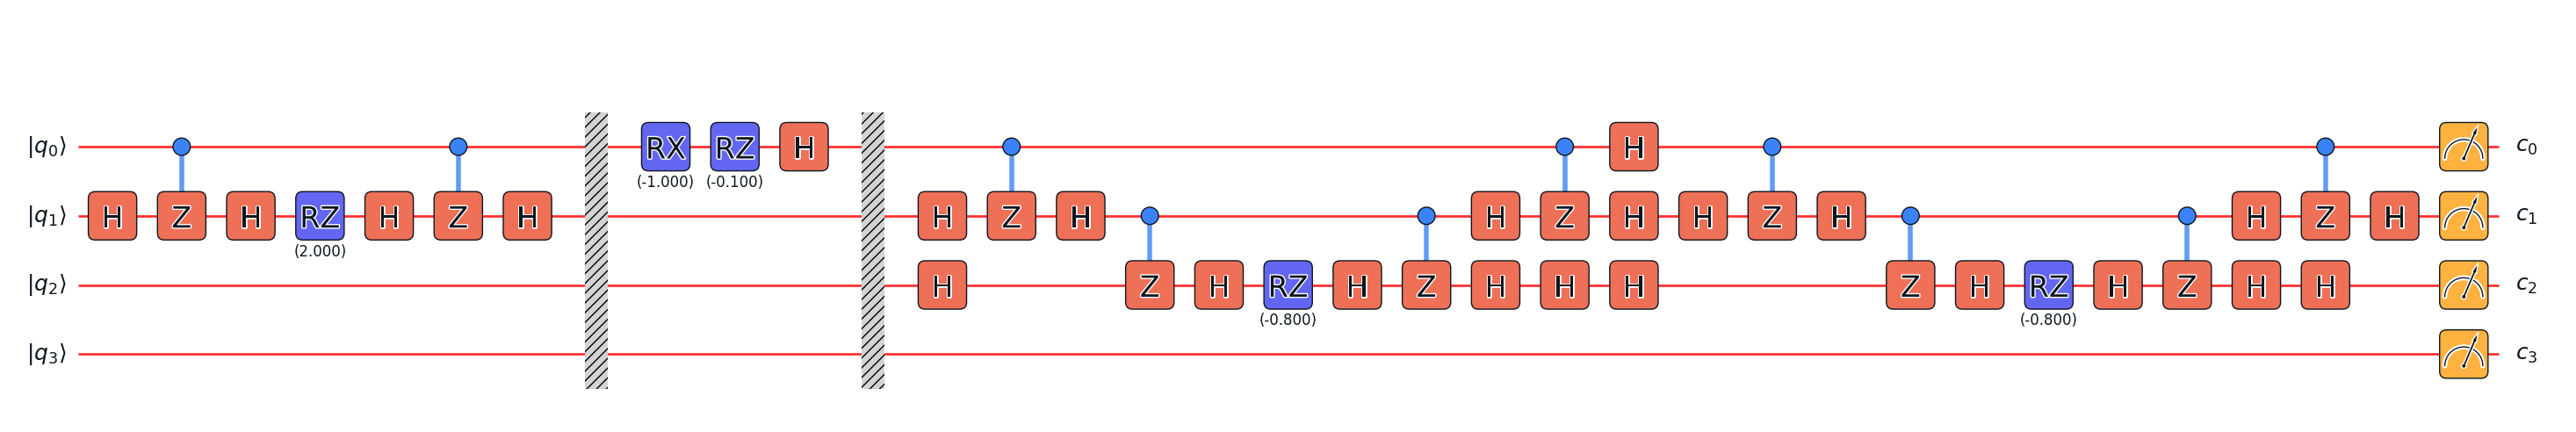

In [11]:
circ.plot_circuit(width=4)

## simulation

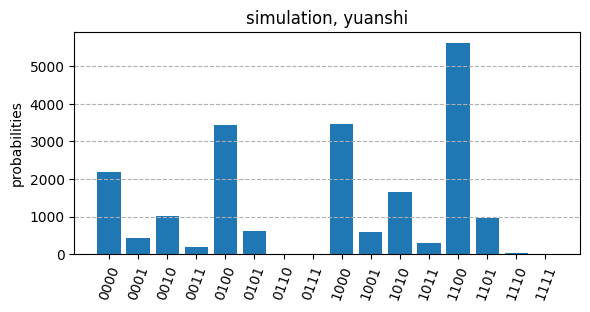

In [45]:
reload(vbw)
reload(tools)
from quafu import simulate
a = simulate(circ, shots=20480).counts
tools.plot_probabilities(a,title='simulation, yuanshi')

# 提交

## read byes

In [19]:
# qmap, chip = {0:'Q119' , 1:'Q120', 2:'Q121'}, 'Baihua'
reload(tools)
n = 4
read_circuits = tools.read_correct_cir(qmap,n)

read_circuits[7]

[('I', 'Q122'),
 ('X', 'Q123'),
 ('X', 'Q124'),
 ('X', 'Q125'),
 ('Barrier', ('Q122', 'Q123', 'Q124', 'Q125', 'Q138', 'Q139')),
 (('Measure', 0), 'Q122'),
 (('Measure', 1), 'Q123'),
 (('Measure', 2), 'Q124'),
 (('Measure', 3), 'Q125')]

In [20]:
tmgr.status()

{'Dongling': 0,
 'Miaofeng': 'Maintenance',
 'Baihua': 0,
 'Yunmeng': 'Maintenance',
 'Haituo': 'Maintenance'}

In [21]:
##轻易不要运行!

tids = []

for i in range(2**n):
# for i in [0]:
    task = {
        'chip':chip,
        'name':'gyb_read',
        'circuit':read_circuits[i],
        'compile' : False, 
    }

    # tmgr = Task(token) 
    tid = tmgr.run(task, repeat=20)
    tids.append(tid)
    print(tid)

2410292126118289040
2410292126120789128
2410292126123289210
2410292126125789224
2410292126128289291
2410292126130633126
2410292126133133195
2410292126135615502
2410292126138115533
2410292126140615594
2410292126143115665
2410292126145459453
2410292126147959548
2410292126150303406
2410292126152803393
2410292126155303470


In [22]:
tids

[2410292126118289040,
 2410292126120789128,
 2410292126123289210,
 2410292126125789224,
 2410292126128289291,
 2410292126130633126,
 2410292126133133195,
 2410292126135615502,
 2410292126138115533,
 2410292126140615594,
 2410292126143115665,
 2410292126145459453,
 2410292126147959548,
 2410292126150303406,
 2410292126152803393,
 2410292126155303470]

In [230]:
### 9.4 ### 57,58,59,60 
tids = [2409041458266762976,
 2409041458269151692,
 2409041458271579707,
 2409041458273948932,
 2409041458276296075,
 2409041458278641699,
 2409041458281026667,
 2409041458283390135,
 2409041458285736651,
 2409041458288104350,
 2409041458290517789,
 2409041458298000794,
 2409041458300395392,
 2409041458302743033,
 2409041458305078119,
 2409041458307413686]

### 9.4 ### 13,14,15,16
tids = [2409042136175053675,
 2409042136177552624,
 2409042136180052525,
 2409042136182549717,
 2409042136184969931,
 2409042136187357170,
 2409042136189897290,
 2409042136192351156,
 2409042136194943429,
 2409042136197327632,
 2409042136199877367,
 2409042136202398288,
 2409042136204786541,
 2409042136207176379,
 2409042136209728870,
 2409042136212239759]

### 9.4 ### 14,15,16,17
tids = [2409042148552489440,
 2409042148554989290,
 2409042148557489367,
 2409042148559989414,
 2409042148562333229,
 2409042148564677029,
 2409042148567177135,
 2409042148569676543,
 2409042148572162102,
 2409042148574662114,
 2409042148577162228,
 2409042148579662280,
 2409042148582162380,
 2409042148584662441,
 2409042148587162493,
 2409042148589662572]

### 9.4 ### 119,120,121,122
tids = [2409042202566932161,
 2409042202569436283,
 2409042202571780065,
 2409042202574123880,
 2409042202576467725,
 2409042202578810912,
 2409042202581155340,
 2409042202583655402,
 2409042202585999221,
 2409042202588343056,
 2409042202590693657,
 2409042202593027771,
 2409042202595371586,
 2409042202597871725,
 2409042203000215527,
 2409042203058239291]

### 9.6 ### 119,120,121,122
tids = [2409061405003958619,
 2409061405070355169,
 2409061405096449360,
 2409061405102230815,
 2409061405104731043,
 2409061408436221477,
 2409061405109731159,
 2409061405112231406,
 2409061405114711462,
 2409061405117212512,
 2409061405119712983,
 2409061405122212622,
 2409061405124712682,
 2409061405127213060,
 2409061405129713235,
 2409061405132212983]

### 9.9 ### 119,120,121,122
tids = [2409091023396020909,
 2409091023398521046,
 2409091023401021110,
 2409091023403521150,
 2409091023406020567,
 2409091023408500702,
 2409091023410844531,
 2409091023413344588,
 2409091027363177465,
 2409091023418344695,
 2409091023420688511,
 2409091023423188604,
 2409091023425688658,
 2409091023428188052,
 2409091023430681342,
 2409091023433182094]

tids = [2409181334191259569,
 2409181333096608083,
 2409181333127544388,
 2409181333135049240,
 2409181333149771017,
 2409181333152161768,
 2409181333155738137,
 2409181333158842821]

### 9.24 ### 119,120,121
tids = [2409242105229774101,
 2409242105232133038,
 2409242105234503059,
 2409242105236869532,
 2409242105239221487,
 2409242105241558659,
 2409242105243925796,
 2409242105246314840]

### 9.25 ### 119,120,121,122 ******
tids = [2409251427192334365,
 2409251427194678819,
 2409251427197026260,
 2409251427199378982,
 2409251427201768026,
 2409251427204166929,
 2409251427206509775,
 2409251427208887579,
 2409251427211216384,
 2409251427213564185,
 2409251427215901435,
 2409251427218281681,
 2409251427220645707,
 2409251427223004061,
 2409251427225337565,
 2409251427227677768]

### 9.25 ### 119,120,121,122, 123 ******
tids = [2409251447251672412,
 2409251447254037524,
 2409251447256346358,
 2409251447258732396,
 2409251447261055991,
 2409251447263404328,
 2409251447265799808,
 2409251447268154268,
 2409251447270528855,
 2409251447272896155,
 2409251447275242061,
 2409251447277591708,
 2409251447284075780,
 2409251447286463758,
 2409251447288827795,
 2409251447291209755,
 2409251447293592749,
 2409251447295955798,
 2409251447298317596,
 2409251447300626519,
 2409251447303002791,
 2409251447307992227,
 2409251447311502374,
 2409251447313826225,
 2409251447316198215,
 2409251447318580393,
 2409251447320950433,
 2409251447323308687,
 2409251447325682229,
 2409251447328066397,
 2409251447330413162,
 2409251447332766067]

### 9.25 ### 119,120,121,122
tids = [2409251520033778959,
 2409251520059983226,
 2409251520075643953,
 2409251520086923410,
 2409251520114354220,
 2409251520116918906,
 2409251520140002312,
 2409251520161532005,
 2409251520163963569,
 2409251520166346406,
 2409251520168737436,
 2409251520171106605,
 2409251520173477671,
 2409251520175859409,
 2409251520178257548,
 2409251520180606101]

### 9.26 ### 121,122,123,124
tids = [2409261550388671750,
 2409261550390999028,
 2409261550393328139,
 2409261550395754242,
 2409261550398132869,
 2409261550400487748,
 2409261550402832628,
 2409261550405197625,
 2409261550407535443,
 2409261550409884303,
 2409261550412213098,
 2409261550414570615,
 2409261550416899283,
 2409261550419237956,
 2409261550421588582,
 2409261550423937714]

### 9.26 ### 57,58,59,60
tids = [2409261919118731032,
 2409261919127793755,
 2409261919130137559,
 2409261919132481433,
 2409261919134826862,
 2409261919137326952,
 2409261919139827002,
 2409261919142170839,
 2409261919144670854,
 2409261919147170910,
 2409261919149514751,
 2409261919152014849,
 2409261919156038522,
 2409261919159339077,
 2409261919161682838,
 2409261919164182926]
### 9.26 ### 57,58,59
tids = [2409262008349085240,
 2409262008353612588,
 2409262008358300212,
 2409262008362831627,
 2409262008367987992,
 2409262008372661287,
 2409262008377192674,
 2409262008380785738]


In [24]:
read_results = {}
read_error = []
for i in range(2**n):  
    try:
        data = tmgr.result(tids[i])['count']
        data_prime =  { k[::-1] : v for k,v in data.items()}
        read_results[i] = data_prime 
        # read_results[i] = tmgr.result(tids[i])['count']
    except:
        read_error.append(i)
        print(i, tids[i])

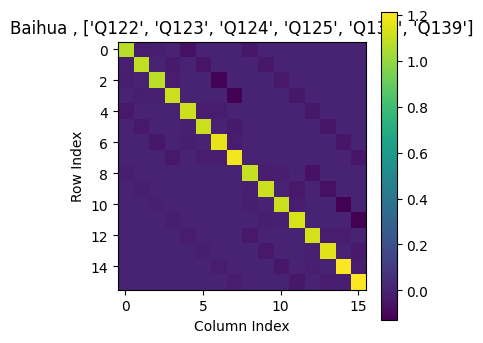

In [25]:
reload(tools)
read_mat = tools.get_read_mat(read_results, n)


plt.figure(figsize=(4, 4))  # 设置图像大小
plt.imshow(read_mat,interpolation='nearest')
plt.colorbar()  
plt.title(f'{chip} , {list(qmap.values())}')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

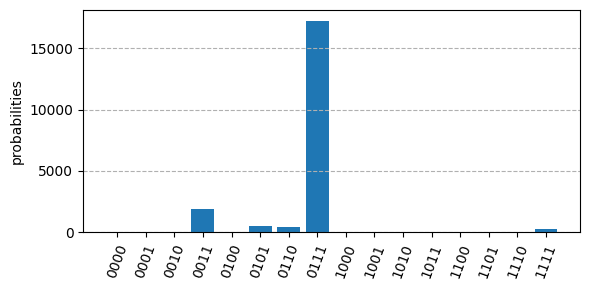

In [26]:
i = 7
reload(tools)
test = {0:tmgr.result(tids[i])['count']}
# test
# after = tools.read_correct(results = test, read_mat=read_mat, n=3)
# tools.plot_probabilities(after['0'])
tools.plot_probabilities(test[0])

## experiment

In [46]:
chip

'Baihua'

In [47]:
task = {'chip': chip,  # chip name
'name': 'vbw_gyb',  # task name
'circuit': qlisp,
'compile':False, 
        }

tid = tmgr.run(task, repeat=20)
tid

2410292143526712292

In [59]:
tmgr.status(tid)

'Finished'

In [60]:
tmgr.result(tid)['count']

{'0010': 701,
 '1100': 6178,
 '0001': 347,
 '0100': 4668,
 '1010': 1108,
 '1000': 1039,
 '1110': 956,
 '0110': 732,
 '1001': 260,
 '0111': 176,
 '0000': 1559,
 '1101': 1184,
 '0101': 927,
 '1111': 214,
 '1011': 247,
 '0011': 184}

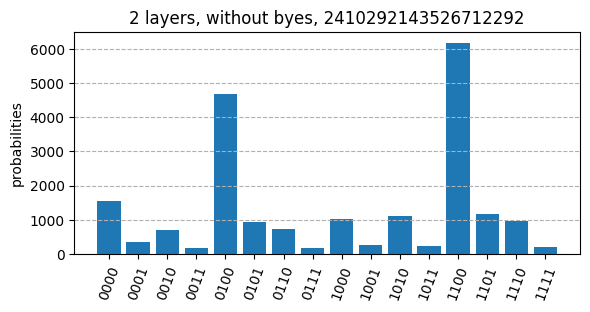

In [61]:
data_raw = tmgr.result(tid)['count']
# data_prime =  { k[::-1] : v for k,v in data.items()}
# tools.plot_probabilities(data_prime)
tools.plot_probabilities(data_raw, title=f'2 layers, without byes, {tid}')

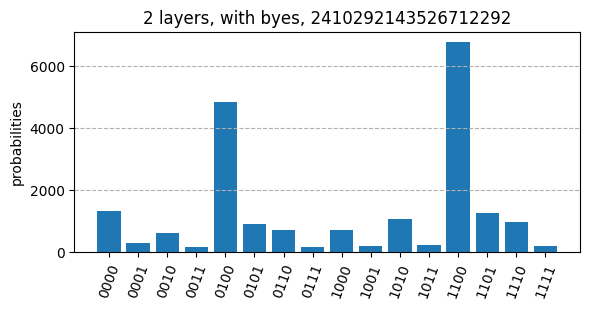

In [62]:
data_byes =tools.r_correct(data_raw,read_mat = read_mat,n=4)
tools.plot_probabilities(data_byes, title=f'2 layers, with byes, {tid}')

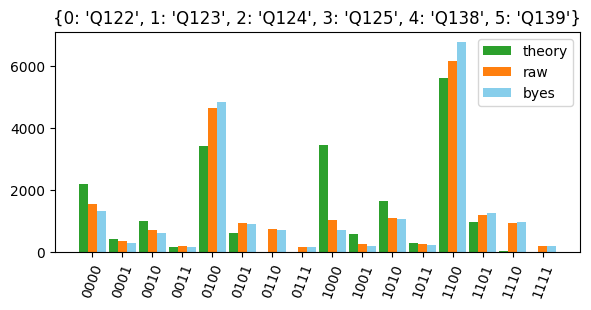

In [63]:
reload(tools)
tools.compare_plot(data_dict= {'theory':a,
                               'raw':data_raw, 
                               'byes':data_byes
                              }, title = qmap)

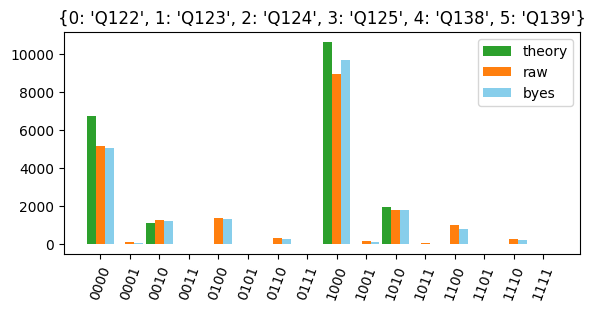

In [40]:
reload(tools)
tools.compare_plot(data_dict= {'theory':a,
                               'raw':data_raw, 
                               'byes':data_byes
                              }, title = qmap)

# Dynamical decoupling

## CPMG

In [17]:
reload(vbw)
reload(tools)
circ = quafuQC(3)
qlisp = []


# vbw.vbw_single(qlisp, circ, j = 1, g = g, h = h, lam = lam)
vbw.vbw_single_CPMG(qlisp, circ, j = 1, g = g, h = h, lam = lam)

# circ.measure()
# circ.measure([1])

qlisp = qlisp + [ (("Measure",i) , i ) for i in range(3)]

qmap, chip = {0:'Q13' , 1:'Q14', 2:'Q15', 3:'Q16'}, 'Baihua'
qmap, chip = {0:'Q14' , 1:'Q15', 2:'Q16', 3:'Q17'}, 'Baihua'
qmap, chip = {0:'Q119' , 1:'Q120', 2:'Q121', 3:'Q122'}, 'Baihua'
# qmap, chip = {0:'Q57' , 1:'Q58', 2:'Q59', 3:'Q60',}, 'Baihua'
qlisp = tools.map_qlisp( qlisp ,qmap )
qlisp


[('H', 'Q120'),
 (('Delay', 1e-07), 'Q119'),
 ('CZ', ('Q119', 'Q120')),
 (('Rz', 1.5707963267948966), 'Q120'),
 (('Ry', 1.9999999999378482), 'Q120'),
 (('Rz', -1.5707963267948966), 'Q120'),
 ('CZ', ('Q119', 'Q120')),
 ('H', 'Q120'),
 ('Barrier', ('Q119', 'Q120', 'Q121', 'Q122')),
 (('Rx', -1.0), 'Q119'),
 (('Rz', -0.1), 'Q119'),
 ('H', 'Q119'),
 ('Barrier', ('Q119', 'Q120', 'Q121', 'Q122')),
 (('Delay', 200), 'Q121'),
 ('H', 'Q120'),
 ('CZ', ('Q119', 'Q120')),
 ('Barrier', ('Q119', 'Q120', 'Q121', 'Q122')),
 ('H', 'Q120'),
 (('Delay', 480), 'Q121'),
 ('H', 'Q121'),
 ('CZ', ('Q120', 'Q121')),
 (('Rz', -1.5707963267948966), 'Q121'),
 (('Ry', 0.7999999999863118), 'Q121'),
 (('Rz', 1.5707963267948966), 'Q121'),
 ('CZ', ('Q120', 'Q121')),
 ('H', 'Q120'),
 ('H', 'Q121'),
 ('CZ', ('Q119', 'Q120')),
 ('H', 'Q120'),
 ('Barrier', ('Q119', 'Q120', 'Q121', 'Q122')),
 (('Measure', 0), 'Q119'),
 (('Measure', 1), 'Q120'),
 (('Measure', 2), 'Q121')]

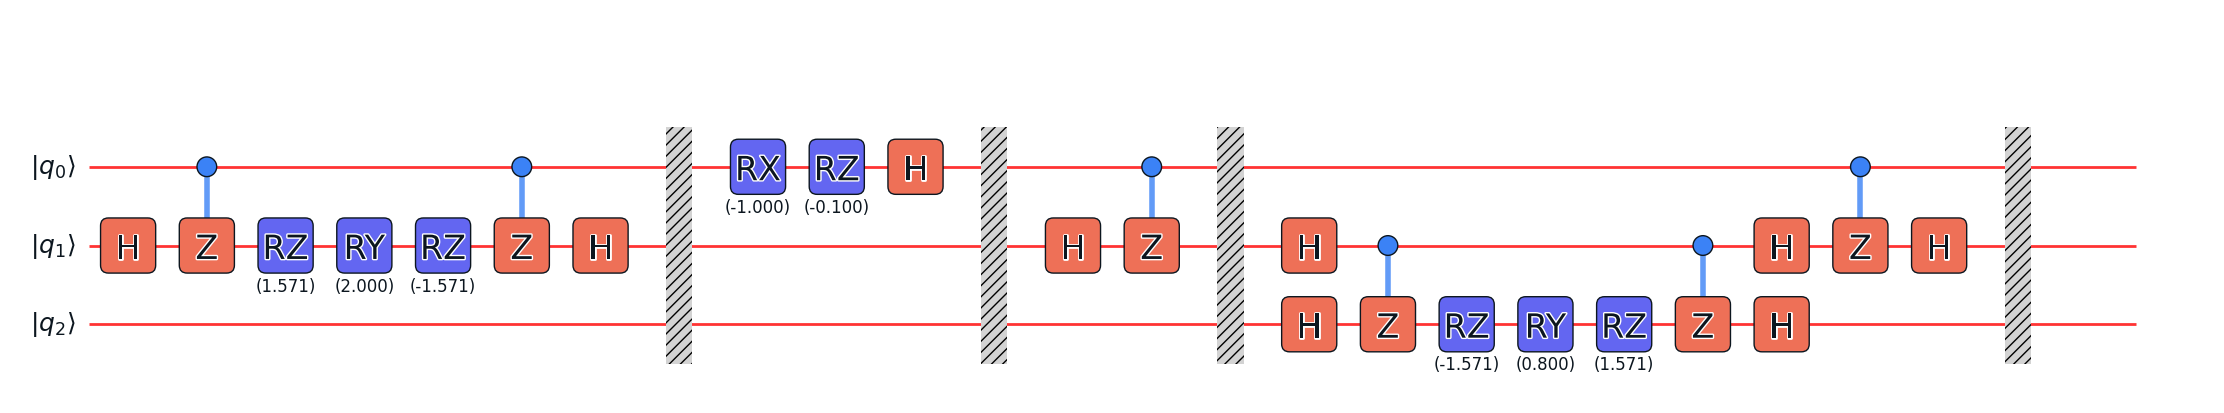

In [18]:
circ.plot_circuit()

In [19]:
task = {'chip': chip,  # chip name
'name': 'vbw_gyb',  # task name
'circuit': qlisp,
'compile':False, 
        }

tid = tmgr.run(task, repeat=10)
tid


NameError: name 'tmgr' is not defined

In [20]:
tmgr.status(tid)

NameError: name 'tmgr' is not defined

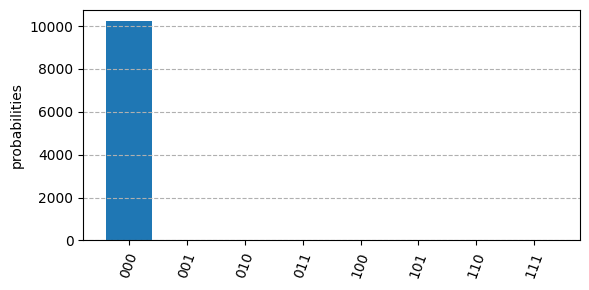

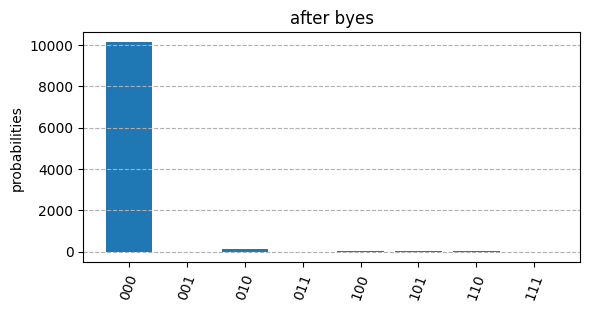

0.9944109699294138


In [135]:
reload(tools)
data = tmgr.result(tid)['count']
data = tools.r_correct(data,read_mat = read_mat, n = 3)
tools.fidelity(circ, data)

In [136]:
data

{'000': 10125.856533667404,
 '001': -22.307899484828024,
 '010': 128.17096534574415,
 '011': -1.966173051626814,
 '100': 5.858052648605478,
 '101': 2.803902034906135,
 '110': 1.8453654383445495,
 '111': -0.26074659854988913}

### 相邻coupler做cz对比特的影响

In [47]:
reload(vbw)
reload(tools)
qmap, chip = {0:'Q119' , 1:'Q120', 2:'Q121', 3:'Q122'}, 'Baihua'

circ = quafuQC(3)
qlisp = []

add_R('Rx', qlisp, circ, np.pi/2, 0)
add_R('Rz', qlisp, circ, np.pi/18, 0)
qlisp.append((('Delay', 1000),0))
add_H(qlisp, circ, 0)
add_CZ(qlisp, circ, 1, 2)
add_CZ(qlisp, circ, 1, 2)
qlisp.append((('Delay', 1000),1))

circ.measure()
qlisp = qlisp + [ (("Measure",i) , i ) for i in range(3)]

qlisp = tools.map_qlisp( qlisp ,qmap )
qlisp

[(('Rx', 1.5707963267948966), 'Q119'),
 (('Rz', 0.17453292519943295), 'Q119'),
 (('Delay', 1000), 'Q119'),
 ('H', 'Q119'),
 ('CZ', ('Q120', 'Q121')),
 ('CZ', ('Q120', 'Q121')),
 (('Delay', 1000), 'Q120'),
 (('Measure', 0), 'Q119'),
 (('Measure', 1), 'Q120'),
 (('Measure', 2), 'Q121')]

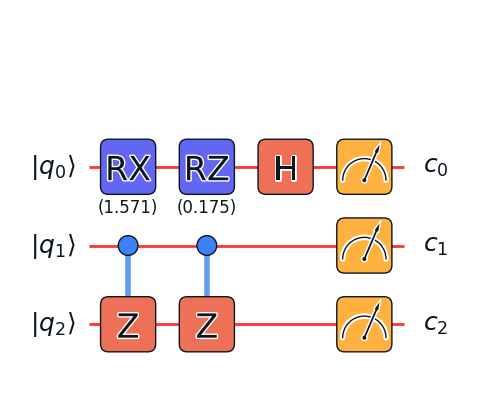

In [48]:
circ.plot_circuit()

In [49]:
task = {'chip': chip,  # chip name
'name': 'vbw_gyb',  # task name
'circuit': qlisp,
'compile':False, 
        }

tid = tmgr.run(task, repeat=10)
tid


NameError: name 'tmgr' is not defined

In [50]:

data = tmgr.result(tid)['count']
# data_prime =  { k[::-1] : v for k,v in data.items()}
# tools.plot_probabilities(data_prime)
tools.plot_probabilities(data, title='1 layers, without byes')

NameError: name 'tmgr' is not defined

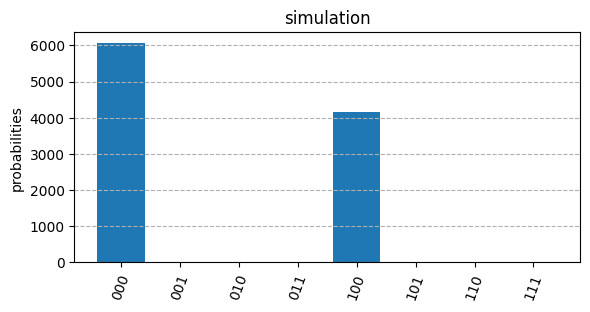

In [2384]:
reload(vbw)
reload(tools)
from quafu import simulate
a = simulate(circ, shots=10240).counts
tools.plot_probabilities(a,title='simulation')

# QST

In [6]:
def pin(theta1, theta2,theta3, theta4):
    circ = quafuQC(2)
    qlisp = []
    # add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi, q0=0)
    # add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0=2)

In [7]:
import qiskit_algorithms
from qlisp.circuits import qstOpList, qst_mle, qptInitList
from qiskit_algorithms.state_fidelities import state_fidelity_result, base_state_fidelity

In [8]:
paulis = list(qstOpList(2))

In [9]:
reload(vbw)
reload(tools)
circ = quafuQC(2)

qlisp = []


# vbw.vbw_single(qlisp, circ, j = 1, g = g, h = h, lam = lam)
# vbw.vbw_single_CPMG(qlisp, circ, j = 1, g = g, h = h, lam = lam)

# add_H(qlisp_ins=qlisp, circ=circ, q0 = 0)
# add_H(qlisp_ins=qlisp, circ=circ, q0 = 1)
add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/1/2, q0=0)
# add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0=0)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)
add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0 = 1)
# add_H(qlisp_ins=qlisp, circ=circ, q0 = 0)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)
add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/1/2, q0=0)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)
add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0 = 1)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)


# circ.measure()
# circ.measure([1])

# qlisp = qlisp + [ (("Measure",i) , i ) for i in range(3)]

qmap, chip = {0:'Q13' , 1:'Q14', 2:'Q15', 3:'Q16'}, 'Baihua'
qmap, chip = {0:'Q14' , 1:'Q15', 2:'Q16', 3:'Q17'}, 'Baihua'
qmap, chip = {0:'Q119' , 1:'Q120', 2:'Q121', 3:'Q122'}, 'Baihua'
qmap, chip = {0:'Q120', 1:'Q121', 2:'Q122'}, 'Baihua'
# qmap, chip = {0:'Q57' , 1:'Q58', 2:'Q59', 3:'Q60',}, 'Baihua'
qmap, chip = {0:'59' , 1:'Q60', 2:'Q61', 3:'Q62',}, 'Baihua'
# qlisp = tools.map_qlisp( qlisp ,qmap )
# qlisp

In [10]:
# circ.measure()
open = circ.to_openqasm()
from qiskit import QuantumCircuit
qis = QuantumCircuit(2)
qis = qis.from_qasm_str(open)
# tools.simulation_qis(qis,plot=True)

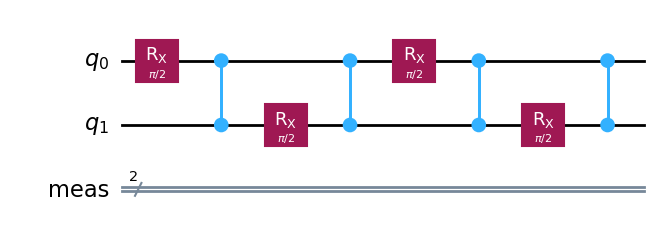

In [11]:
qis.draw(output='mpl')

array([0.25, 0.25, 0.25, 0.25])

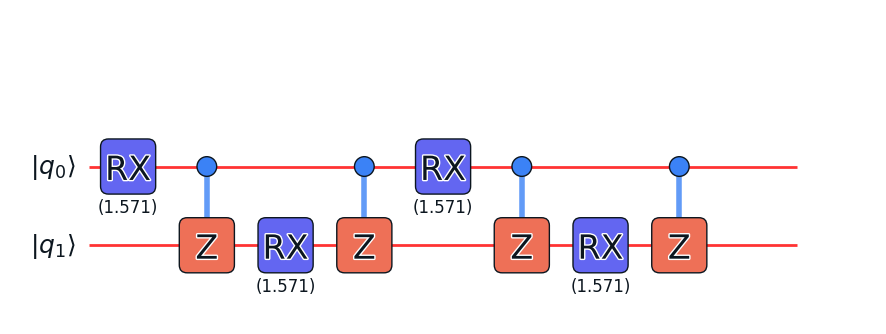

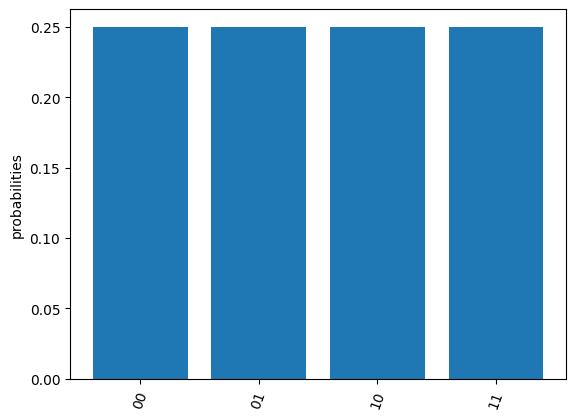

In [16]:
# circ.measure()?
circ.plot_circuit()
simulate(circ).plot_probabilities()
simulate(circ).probabilities

In [17]:
qlisp

[(('Rx', 1.5707963267948966), 0),
 ('CZ', (0, 1)),
 (('Rx', 1.5707963267948966), 1),
 ('CZ', (0, 1)),
 (('Rx', 1.5707963267948966), 0),
 ('CZ', (0, 1)),
 (('Rx', 1.5707963267948966), 1),
 ('CZ', (0, 1))]

In [16]:

qlisp_dict = {pauli: qlisp for pauli in paulis}
for pl in qlisp_dict.keys():
    # qlisp_dict[pl] = qlisp_dict[pl] + [(pl[0], 0), (pl[1], 1), (pl[2], 2)] + [ (("Measure",i) , i ) for i in range(3)]
    qlisp_dict[pl] = qlisp_dict[pl] + [(pl[0], 0), (pl[1], 1)] + [ (("Measure",i) , i ) for i in range(2)]
    qlisp_dict[pl] = tools.map_qlisp( qlisp_dict[pl] ,qmap )

NameError: name 'paulis' is not defined

In [17]:
qlisp_dict[pl]

NameError: name 'qlisp_dict' is not defined

In [192]:
chip = 'Baihua'
tids = {pl:0 for pl in qlisp_dict.keys()}
for pl, ql in qlisp_dict.items():
        task = {'chip': chip,  # chip name
        'name': 'qst_gyb',  # task name
        'circuit': ql,
        'compile':False, 
                }

        tids[pl] = tmgr.run(task, repeat=5)


In [193]:
ress.shape

(9, 4)

In [195]:
res = {}
string = [bin(i)[2:].zfill(2) for i in range(2**2)]
ress = pd.DataFrame(index = paulis, columns=string )
for pl, tid in tids.items():
    # res[pl] 
    try:
        data = tmgr.result(tid)['count']
        # data = tools.r_correct(data,read_mat = read_mat, n = 3)
        for j in string:
            ress[j][pl] = data[j]
        print(tid)
    except:
        print(tmgr.status(tid))
# res

ress = np.array(ress,dtype=float)

density = qst_mle(diags = ress/5120)

/var/folders/z9/zsb0ck7s4bxd7nwf3h60xzxw0000gn/T/ipykernel_57982/92262555.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ress[j][pl] = data[j]


2410061622048997012
2410061622051340925
2410061622053684735
2410061622056184765
2410061622058684762
2410061622061184085
2410061622063684157
2410061622066022813
2410061622068510382


In [196]:
density 

array([[ 0.24830657+0.j        ,  0.20293807-0.00566535j,
         0.2256246 -0.03256273j, -0.21857487+0.00515827j],
       [ 0.20293807+0.00566535j,  0.2499257 +0.j        ,
         0.20531612+0.03725127j, -0.21814679+0.02333176j],
       [ 0.2256246 +0.03256273j,  0.20531612-0.03725127j,
         0.26055416+0.j        , -0.20303951+0.00882852j],
       [-0.21857487-0.00515827j, -0.21814679-0.02333176j,
        -0.20303951-0.00882852j,  0.24121357+0.j        ]])

In [110]:
array = np.array
density1 = array([[ 9.82685571e-01+0.00000000e+00j, -2.14978766e-02+2.32080214e-02j,
        -2.75543746e-02+5.80996135e-02j, -8.59062890e-03+8.56836303e-03j,
        -3.46633095e-02+4.04597920e-02j,  1.52419265e-03-2.98958526e-03j,
        -2.75576244e-03+3.78944053e-03j,  1.06550088e-03-2.88380111e-03j],
       [-2.14978766e-02-2.32080214e-02j,  1.72639803e-03+0.00000000e+00j,
        -3.03572159e-04-3.64806025e-04j,  9.99014241e-04-1.85603062e-05j,
         1.62753526e-03-1.39592571e-04j, -3.75091319e-04+1.35953914e-04j,
         5.64712771e-08+1.04154092e-04j, -3.52418951e-04+1.45796410e-04j],
       [-2.75543746e-02-5.80996135e-02j, -3.03572159e-04+3.64806025e-04j,
         1.16659134e-02+0.00000000e+00j, -1.22897490e-03+1.56534590e-04j,
         3.61117420e-03+1.19417288e-03j,  6.99691037e-04-2.50093805e-04j,
         8.25200357e-04-2.74798036e-04j,  6.86751173e-04-2.33801739e-04j],
       [-8.59062890e-03-8.56836303e-03j,  9.99014241e-04+1.85603062e-05j,
        -1.22897490e-03-1.56534590e-04j,  6.75633628e-04+0.00000000e+00j,
         5.85433425e-04-1.20562720e-04j, -2.78925712e-04+9.14539277e-05j,
        -7.73352095e-05+8.74372254e-05j, -2.65356008e-04+9.61473388e-05j],
       [-3.46633095e-02-4.04597920e-02j,  1.62753526e-03+1.39592571e-04j,
         3.61117420e-03-1.19417288e-03j,  5.85433425e-04+1.20562720e-04j,
         2.91212811e-03+0.00000000e+00j, -1.55368215e-04-1.58690753e-06j,
         2.61857355e-04-5.06869400e-05j, -1.36196130e-04+1.44076550e-05j],
       [ 1.52419265e-03+2.98958526e-03j, -3.75091319e-04-1.35953914e-04j,
         6.99691037e-04+2.50093805e-04j, -2.78925712e-04-9.14539277e-05j,
        -1.55368215e-04+1.58690753e-06j,  1.33369772e-04+0.00000000e+00j,
         5.96753281e-05-2.48898655e-05j,  1.28678684e-04-3.25382470e-06j],
       [-2.75576244e-03-3.78944053e-03j,  5.64712771e-08-1.04154092e-04j,
         8.25200357e-04+2.74798036e-04j, -7.73352095e-05-8.74372254e-05j,
         2.61857355e-04+5.06869400e-05j,  5.96753281e-05+2.48898655e-05j,
         7.66245299e-05+0.00000000e+00j,  5.94597881e-05+2.43111393e-05j],
       [ 1.06550088e-03+2.88380111e-03j, -3.52418951e-04-1.45796410e-04j,
         6.86751173e-04+2.33801739e-04j, -2.65356008e-04-9.61473388e-05j,
        -1.36196130e-04-1.44076550e-05j,  1.28678684e-04+3.25382470e-06j,
         5.94597881e-05-2.43111393e-05j,  1.24361161e-04+0.00000000e+00j]])

density2 = array([[ 4.64878612e-01+0.00000000e+00j, -1.64456075e-02+9.36468190e-03j,
         4.67254244e-01+7.00573332e-02j, -1.24750854e-03+6.33552776e-04j,
         2.06658103e-03+2.55252746e-03j,  4.67921570e-03+5.26226207e-03j,
         5.80217551e-04-2.73035662e-03j,  3.29899327e-03+6.17204174e-03j],
       [-1.64456075e-02-9.36468190e-03j,  1.34380908e-03+0.00000000e+00j,
        -1.32140171e-02-8.48196897e-03j,  5.80749421e-05-1.71329982e-05j,
         1.57342250e-03-1.69659177e-04j, -4.46971500e-04+3.22885759e-04j,
        -1.61910460e-03+1.87372680e-04j,  2.77285789e-04-5.87577915e-04j],
       [ 4.67254244e-01-7.00573332e-02j, -1.32140171e-02+8.48196897e-03j,
         5.08566113e-01+0.00000000e+00j, -1.27829250e-03+8.01712071e-04j,
         7.44848208e-03-3.79314445e-03j,  7.35264473e-03+8.00451890e-03j,
        -4.37947966e-03+3.16693298e-03j,  3.49143965e-03+3.99944990e-03j],
       [-1.24750854e-03-6.33552776e-04j,  5.80749421e-05+1.71329982e-05j,
        -1.27829250e-03-8.01712071e-04j,  6.32128814e-06+0.00000000e+00j,
         1.02902825e-04+3.63024798e-05j, -5.05436762e-05-1.73120602e-05j,
        -1.10788007e-04-3.42654315e-05j,  3.54539273e-05-1.95027412e-05j],
       [ 2.06658103e-03-2.55252746e-03j,  1.57342250e-03+1.69659177e-04j,
         7.44848208e-03+3.79314445e-03j,  1.02902825e-04-3.63024798e-05j,
         1.16158710e-02+0.00000000e+00j, -2.82589644e-03+2.58416806e-03j,
        -1.13742500e-02+4.08112531e-04j,  2.62148837e-03-1.16036145e-03j],
       [ 4.67921570e-03-5.26226207e-03j, -4.46971500e-04-3.22885759e-04j,
         7.35264473e-03-8.00451890e-03j, -5.05436762e-05+1.73120602e-05j,
        -2.82589644e-03-2.58416806e-03j,  1.55722344e-03+0.00000000e+00j,
         2.89259444e-03+2.38350052e-03j, -8.85884415e-04-2.04848240e-04j],
       [ 5.80217551e-04+2.73035662e-03j, -1.61910460e-03-1.87372680e-04j,
        -4.37947966e-03-3.16693298e-03j, -1.10788007e-04+3.42654315e-05j,
        -1.13742500e-02-4.08112531e-04j,  2.89259444e-03-2.38350052e-03j,
         1.11689336e-02+0.00000000e+00j, -2.60347427e-03+1.07420115e-03j],
       [ 3.29899327e-03-6.17204174e-03j,  2.77285789e-04+5.87577915e-04j,
         3.49143965e-03-3.99944990e-03j,  3.54539273e-05+1.95027412e-05j,
         2.62148837e-03+1.16036145e-03j, -8.85884415e-04+2.04848240e-04j,
        -2.60347427e-03-1.07420115e-03j,  8.63116328e-04+0.00000000e+00j]])

density3 = array([[ 2.32013908e-01+0.00000000e+00j,  2.45907144e-01+2.08804599e-02j,
         1.83893809e-04+4.70826147e-03j,  3.81904590e-03+2.48345495e-03j,
        -3.68637439e-03-3.04676128e-03j, -6.26837216e-03+1.62233542e-03j,
         1.26688062e-01+2.02542343e-01j,  1.18289417e-01+2.14717803e-01j],
       [ 2.45907144e-01-2.08804599e-02j,  2.62511492e-01+0.00000000e+00j,
         6.18633027e-04+4.97364729e-03j,  4.27123683e-03+2.28846573e-03j,
        -4.18131646e-03-2.89744342e-03j, -6.49772420e-03+2.28361467e-03j,
         1.52502395e-01+2.03269297e-01j,  1.44696581e-01+2.16929686e-01j],
       [ 1.83893809e-04-4.70826147e-03j,  6.18633027e-04-4.97364729e-03j,
         9.56905695e-05+0.00000000e+00j,  5.34237548e-05-7.55315696e-05j,
        -6.47497828e-05+7.23927892e-05j,  2.79537747e-05+1.28490024e-04j,
         4.21060731e-03-2.41034790e-03j,  4.45102735e-03-2.23026384e-03j],
       [ 3.81904590e-03-2.48345495e-03j,  4.27123683e-03-2.28846573e-03j,
         5.34237548e-05+7.55315696e-05j,  8.94457586e-05+0.00000000e+00j,
        -9.32915078e-05-1.06923609e-05j, -8.58147005e-05+9.38003822e-05j,
         4.25333254e-03+1.97787456e-03j,  4.24541231e-03+2.26818604e-03j],
       [-3.68637439e-03+3.04676128e-03j, -4.18131646e-03+2.89744342e-03j,
        -6.47497828e-05-7.23927892e-05j, -9.32915078e-05+1.06923609e-05j,
         9.85807729e-05+0.00000000e+00j,  7.82914178e-05-1.08091664e-04j,
        -4.67264140e-03-1.55446984e-03j, -4.69908452e-03-1.85821013e-03j],
       [-6.26837216e-03-1.62233542e-03j, -6.49772420e-03-2.28361467e-03j,
         2.79537747e-05-1.28490024e-04j, -8.58147005e-05-9.38003822e-05j,
         7.82914178e-05+1.08091664e-04j,  1.80698054e-04+0.00000000e+00j,
        -2.00650171e-03-6.35798656e-03j, -1.69445786e-03-6.62820700e-03j],
       [ 1.26688062e-01-2.02542343e-01j,  1.52502395e-01-2.03269297e-01j,
         4.21060731e-03+2.41034790e-03j,  4.25333254e-03-1.97787456e-03j,
        -4.67264140e-03+1.55446984e-03j, -2.00650171e-03+6.35798656e-03j,
         2.45990708e-01+0.00000000e+00j,  2.52033614e-01+1.39800530e-02j],
       [ 1.18289417e-01-2.14717803e-01j,  1.44696581e-01-2.16929686e-01j,
         4.45102735e-03+2.23026384e-03j,  4.24541231e-03-2.26818604e-03j,
        -4.69908452e-03+1.85821013e-03j, -1.69445786e-03+6.62820700e-03j,
         2.52033614e-01-1.39800530e-02j,  2.59019477e-01+0.00000000e+00j]])

density4 = array([[ 2.31760731e-01+0.00000000e+00j,  2.34047814e-01+9.67722702e-03j,
        -1.05327364e-03+1.64719882e-02j, -4.09955499e-03+7.40660923e-04j,
        -7.93500100e-03+1.11504802e-02j, -8.76426651e-03+1.03968832e-02j,
        -3.93008924e-02+2.22878305e-01j,  4.12742428e-02-2.38213835e-01j],
       [ 2.34047814e-01-9.67722702e-03j,  2.52445581e-01+0.00000000e+00j,
         1.60171273e-03+1.64720381e-02j, -7.54237082e-03+9.96063237e-03j,
        -6.64265899e-03+1.30149082e-02j, -7.23436493e-03+1.19362873e-02j,
        -3.41805278e-02+2.28282481e-01j,  3.74255328e-02-2.43565611e-01j],
       [-1.05327364e-03-1.64719882e-02j,  1.60171273e-03-1.64720381e-02j,
         5.51835072e-03+0.00000000e+00j, -3.12348218e-03-2.63311473e-04j,
         2.14650484e-03+1.26282678e-03j,  2.64198813e-03+1.42387748e-03j,
         1.13290365e-02+6.40387408e-03j, -1.24873503e-02-8.09885466e-03j],
       [-4.09955499e-03-7.40660923e-04j, -7.54237082e-03-9.96063237e-03j,
        -3.12348218e-03+2.63311473e-04j,  8.40844613e-03+0.00000000e+00j,
        -2.16206474e-04-8.73786271e-04j, -8.50480767e-04-8.27109638e-04j,
         4.04644386e-03-6.54792376e-03j, -3.51136425e-03+6.62969684e-03j],
       [-7.93500100e-03-1.11504802e-02j, -6.64265899e-03-1.30149082e-02j,
         2.14650484e-03-1.26282678e-03j, -2.16206474e-04+8.73786271e-04j,
         1.43103179e-03+0.00000000e+00j,  1.57736161e-03-7.10333315e-06j,
         1.13497772e-02-3.39555740e-03j, -1.23379105e-02+3.20692127e-03j],
       [-8.76426651e-03-1.03968832e-02j, -7.23436493e-03-1.19362873e-02j,
         2.64198813e-03-1.42387748e-03j, -8.50480767e-04+8.27109638e-04j,
         1.57736161e-03+7.10333315e-06j,  1.80918253e-03+0.00000000e+00j,
         1.02979850e-02-3.68228026e-03j, -1.13101183e-02+3.40417664e-03j],
       [-3.93008924e-02-2.22878305e-01j, -3.41805278e-02-2.28282481e-01j,
         1.13290365e-02-6.40387408e-03j,  4.04644386e-03+6.54792376e-03j,
         1.13497772e-02+3.39555740e-03j,  1.02979850e-02+3.68228026e-03j,
         2.31267969e-01+0.00000000e+00j, -2.48322990e-01+2.49343610e-03j],
       [ 4.12742428e-02+2.38213835e-01j,  3.74255328e-02+2.43565611e-01j,
        -1.24873503e-02+8.09885466e-03j, -3.51136425e-03-6.62969684e-03j,
        -1.23379105e-02-3.20692127e-03j, -1.13101183e-02-3.40417664e-03j,
        -2.48322990e-01-2.49343610e-03j,  2.67358708e-01+0.00000000e+00j]])

density5 = array([[ 9.82685571e-01+0.00000000e+00j, -2.14978766e-02+2.32080214e-02j,
        -2.75543746e-02+5.80996135e-02j, -8.59062890e-03+8.56836303e-03j,
        -3.46633095e-02+4.04597920e-02j,  1.52419265e-03-2.98958526e-03j,
        -2.75576244e-03+3.78944053e-03j,  1.06550088e-03-2.88380111e-03j],
       [-2.14978766e-02-2.32080214e-02j,  1.72639803e-03+0.00000000e+00j,
        -3.03572159e-04-3.64806025e-04j,  9.99014241e-04-1.85603062e-05j,
         1.62753526e-03-1.39592571e-04j, -3.75091319e-04+1.35953914e-04j,
         5.64712771e-08+1.04154092e-04j, -3.52418951e-04+1.45796410e-04j],
       [-2.75543746e-02-5.80996135e-02j, -3.03572159e-04+3.64806025e-04j,
         1.16659134e-02+0.00000000e+00j, -1.22897490e-03+1.56534590e-04j,
         3.61117420e-03+1.19417288e-03j,  6.99691037e-04-2.50093805e-04j,
         8.25200357e-04-2.74798036e-04j,  6.86751173e-04-2.33801739e-04j],
       [-8.59062890e-03-8.56836303e-03j,  9.99014241e-04+1.85603062e-05j,
        -1.22897490e-03-1.56534590e-04j,  6.75633628e-04+0.00000000e+00j,
         5.85433425e-04-1.20562720e-04j, -2.78925712e-04+9.14539277e-05j,
        -7.73352095e-05+8.74372254e-05j, -2.65356008e-04+9.61473388e-05j],
       [-3.46633095e-02-4.04597920e-02j,  1.62753526e-03+1.39592571e-04j,
         3.61117420e-03-1.19417288e-03j,  5.85433425e-04+1.20562720e-04j,
         2.91212811e-03+0.00000000e+00j, -1.55368215e-04-1.58690753e-06j,
         2.61857355e-04-5.06869400e-05j, -1.36196130e-04+1.44076550e-05j],
       [ 1.52419265e-03+2.98958526e-03j, -3.75091319e-04-1.35953914e-04j,
         6.99691037e-04+2.50093805e-04j, -2.78925712e-04-9.14539277e-05j,
        -1.55368215e-04+1.58690753e-06j,  1.33369772e-04+0.00000000e+00j,
         5.96753281e-05-2.48898655e-05j,  1.28678684e-04-3.25382470e-06j],
       [-2.75576244e-03-3.78944053e-03j,  5.64712771e-08-1.04154092e-04j,
         8.25200357e-04+2.74798036e-04j, -7.73352095e-05-8.74372254e-05j,
         2.61857355e-04+5.06869400e-05j,  5.96753281e-05+2.48898655e-05j,
         7.66245299e-05+0.00000000e+00j,  5.94597881e-05+2.43111393e-05j],
       [ 1.06550088e-03+2.88380111e-03j, -3.52418951e-04-1.45796410e-04j,
         6.86751173e-04+2.33801739e-04j, -2.65356008e-04-9.61473388e-05j,
        -1.36196130e-04-1.44076550e-05j,  1.28678684e-04+3.25382470e-06j,
         5.94597881e-05-2.43111393e-05j,  1.24361161e-04+0.00000000e+00j]])

density6 = array([[ 4.76816146e-01+0.00000000e+00j, -9.06305251e-03+1.17523807e-02j,
        -2.40948997e-02+5.52737858e-02j, -9.11078616e-03-4.62841409e-03j,
        -1.44366532e-02+4.34310791e-01j,  2.55807435e-03-2.01539033e-02j,
        -3.91432402e-02-4.33825526e-03j,  1.09231967e-03+2.15336446e-03j],
       [-9.06305251e-03-1.17523807e-02j,  8.61251011e-03+0.00000000e+00j,
         3.92911526e-03+2.16427341e-03j, -1.44717836e-03+5.97782924e-04j,
         1.35146017e-02-1.31507519e-02j,  5.16699284e-03-3.91704012e-03j,
        -2.22952915e-03+3.09065087e-03j,  5.79233075e-04-1.23865287e-03j],
       [-2.40948997e-02-5.52737858e-02j,  3.92911526e-03-2.16427341e-03j,
         1.95500264e-02+0.00000000e+00j, -1.05275229e-03+1.83330452e-04j,
         4.69948145e-02-8.91496573e-03j, -1.04009735e-03-4.45265517e-03j,
         9.00020355e-03-8.38902323e-04j,  7.39382230e-04-2.94367606e-03j],
       [-9.11078616e-03+4.62841409e-03j, -1.44717836e-03-5.97782924e-04j,
        -1.05275229e-03-1.83330452e-04j,  1.93881916e-03+0.00000000e+00j,
        -9.06777221e-03-4.83501537e-03j,  4.53621067e-04+1.11538386e-04j,
        -9.59052438e-04+7.51476945e-04j, -6.21632238e-04+9.25187839e-04j],
       [-1.44366532e-02-4.34310791e-01j,  1.35146017e-02+1.31507519e-02j,
         4.69948145e-02+8.91496573e-03j, -9.06777221e-03+4.83501537e-03j,
         4.47286536e-01+0.00000000e+00j, -2.68804534e-02+1.21329922e-03j,
        -8.99678284e-03+4.35073858e-02j,  1.63604442e-04-5.84241739e-03j],
       [ 2.55807435e-03+2.01539033e-02j,  5.16699284e-03+3.91704012e-03j,
        -1.04009735e-03+4.45265517e-03j,  4.53621067e-04-1.11538386e-04j,
        -2.68804534e-02-1.21329922e-03j,  1.24651131e-02+0.00000000e+00j,
        -2.02463342e-03-6.80597953e-03j, -1.37373156e-03+2.10038612e-03j],
       [-3.91432402e-02+4.33825526e-03j, -2.22952915e-03-3.09065087e-03j,
         9.00020355e-03+8.38902323e-04j, -9.59052438e-04-7.51476945e-04j,
        -8.99678284e-03-4.35073858e-02j, -2.02463342e-03+6.80597953e-03j,
         2.64748577e-02+0.00000000e+00j, -1.05371975e-03-1.85684010e-03j],
       [ 1.09231967e-03-2.15336446e-03j,  5.79233075e-04+1.23865287e-03j,
         7.39382230e-04+2.94367606e-03j, -6.21632238e-04-9.25187839e-04j,
         1.63604442e-04+5.84241739e-03j, -1.37373156e-03-2.10038612e-03j,
        -1.05371975e-03+1.85684010e-03j,  6.85599220e-03+0.00000000e+00j]])

density7 = array([[ 9.90298421e-01+0.00000000e+00j, -2.13273484e-02+3.19583297e-02j,
        -3.85122789e-02+5.33844795e-02j, -1.59494046e-03-9.92415644e-03j,
        -4.29520606e-02+4.02899667e-02j,  6.20113293e-03-7.81296417e-03j,
        -1.21400343e-03-8.81979998e-03j, -3.09729080e-03-6.37363997e-03j],
       [-2.13273484e-02-3.19583297e-02j,  1.49065231e-03+0.00000000e+00j,
         2.55220399e-03+9.31423361e-05j, -2.85917463e-04+2.65200438e-04j,
         2.22524196e-03+5.18427519e-04j, -3.85684758e-04-3.18571057e-05j,
        -2.58482288e-04+2.29123327e-04j, -1.38982234e-04+2.37218474e-04j],
       [-3.85122789e-02-5.33844795e-02j,  2.55220399e-03-9.31423361e-05j,
         4.37554800e-03+0.00000000e+00j, -4.72959589e-04+4.71925368e-04j,
         3.84231718e-03+7.48577348e-04j, -6.62336496e-04-3.04445595e-05j,
        -4.28241007e-04+4.08442070e-04j, -2.23134482e-04+4.14835214e-04j],
       [-1.59494046e-03+9.92415644e-03j, -2.85917463e-04-2.65200438e-04j,
        -4.72959589e-04-4.71925368e-04j,  1.02022495e-04+0.00000000e+00j,
        -3.34583945e-04-4.95328535e-04j,  6.83093494e-05+7.47271978e-05j,
         9.03417960e-05+2.03887624e-06j,  6.88610555e-05-2.07739624e-05j],
       [-4.29520606e-02-4.02899667e-02j,  2.22524196e-03-5.18427519e-04j,
         3.84231718e-03-7.48577348e-04j, -3.34583945e-04+4.95328535e-04j,
         3.50213718e-03+0.00000000e+00j, -5.86828668e-04+8.65794281e-05j,
        -3.06175888e-04+4.31931155e-04j, -1.24971137e-04+4.02455163e-04j],
       [ 6.20113293e-03+7.81296417e-03j, -3.85684758e-04+3.18571057e-05j,
        -6.62336496e-04+3.04445595e-05j,  6.83093494e-05-7.47271978e-05j,
        -5.86828668e-04-8.65794281e-05j,  1.00471188e-04+0.00000000e+00j,
         6.19819069e-05-6.48064422e-05j,  3.08899904e-05-6.43470790e-05j],
       [-1.21400343e-03+8.81979998e-03j, -2.58482288e-04-2.29123327e-04j,
        -4.28241007e-04-4.08442070e-04j,  9.03417960e-05-2.03887624e-06j,
        -3.06175888e-04-4.31931155e-04j,  6.19819069e-05+6.48064422e-05j,
         8.00391825e-05+0.00000000e+00j,  6.05618973e-05-1.97716811e-05j],
       [-3.09729080e-03+6.37363997e-03j, -1.38982234e-04-2.37218474e-04j,
        -2.23134482e-04-4.14835214e-04j,  6.88610555e-05+2.07739624e-05j,
        -1.24971137e-04-4.02455163e-04j,  3.08899904e-05+6.43470790e-05j,
         6.05618973e-05+1.97716811e-05j,  5.07084488e-05+0.00000000e+00j]])

density8 = array([[ 4.33968445e-01+0.00000000e+00j,  2.27080362e-02-1.65872208e-02j,
         4.55834540e-01+4.31482780e-02j,  1.82085543e-02-2.52104172e-02j,
        -1.15462494e-02+1.31989004e-02j,  2.32782500e-04-1.56988107e-02j,
         1.21480046e-02-1.33503959e-02j,  3.14269828e-04+1.53035831e-02j],
       [ 2.27080362e-02+1.65872208e-02j,  3.75516087e-03+0.00000000e+00j,
         2.09219823e-02+2.70040297e-02j,  2.37000388e-03-7.87005866e-04j,
        -2.02919489e-03+1.15481046e-03j,  9.80438580e-04-5.11423874e-04j,
         2.05880291e-03-1.12258274e-03j, -1.03934189e-03+5.10026874e-04j],
       [ 4.55834540e-01-4.31482780e-02j,  2.09219823e-02-2.70040297e-02j,
         5.48729318e-01+0.00000000e+00j,  1.81839811e-02-3.29261146e-02j,
        -6.48773092e-03+8.22332495e-03j, -4.38853385e-03-2.06991133e-02j,
         7.15903626e-03-8.49352512e-03j,  5.04582634e-03+2.05159919e-02j],
       [ 1.82085543e-02+2.52104172e-02j,  2.37000388e-03+7.87005866e-04j,
         1.81839811e-02+3.29261146e-02j,  2.76271396e-03+0.00000000e+00j,
        -7.34530833e-04-6.08331045e-04j,  9.27925702e-04-1.04132537e-03j,
         7.69896340e-04+6.34393298e-04j, -8.93473729e-04+1.04540514e-03j],
       [-1.15462494e-02-1.31989004e-02j, -2.02919489e-03-1.15481046e-03j,
        -6.48773092e-03-8.22332495e-03j, -7.34530833e-04+6.08331045e-04j,
         4.10100084e-03+0.00000000e+00j,  1.28214438e-04-9.62187171e-04j,
        -4.09204637e-03-2.35054299e-05j, -7.91666575e-05+1.01981750e-03j],
       [ 2.32782500e-04+1.56988107e-02j,  9.80438580e-04+5.11423874e-04j,
        -4.38853385e-03+2.06991133e-02j,  9.27925702e-04+1.04132537e-03j,
         1.28214438e-04+9.62187171e-04j,  1.29167553e-03+0.00000000e+00j,
        -1.14686131e-04-9.29755384e-04j, -1.29608845e-03+5.05551954e-05j],
       [ 1.21480046e-02+1.33503959e-02j,  2.05880291e-03+1.12258274e-03j,
         7.15903626e-03+8.49352512e-03j,  7.69896340e-04-6.34393298e-04j,
        -4.09204637e-03+2.35054299e-05j, -1.14686131e-04+9.29755384e-04j,
         4.08429687e-03+0.00000000e+00j,  6.70947452e-05-9.86669479e-04j],
       [ 3.14269828e-04-1.53035831e-02j, -1.03934189e-03-5.10026874e-04j,
         5.04582634e-03-2.05159919e-02j, -8.93473729e-04-1.04540514e-03j,
        -7.91666575e-05-1.01981750e-03j, -1.29608845e-03-5.05551954e-05j,
         6.70947452e-05+9.86669479e-04j,  1.30738885e-03+0.00000000e+00j]])

d0 = array([[ 9.77688037e-01+0.00000000e+00j, -4.86207811e-02+4.92805726e-02j,
        -5.28197478e-02+4.89812296e-02j,  1.72458572e-03-2.27927249e-02j,
        -5.29758879e-02+5.72323903e-02j, -3.61085298e-03-8.69103662e-03j,
         2.82193403e-03-7.88412211e-03j,  5.93719290e-03+2.02017673e-03j],
       [-4.86207811e-02-4.92805726e-02j,  5.09941496e-03+0.00000000e+00j,
         5.91538594e-03+3.29560450e-04j, -1.54929670e-03+1.27035181e-03j,
         5.50534248e-03-2.02644943e-04j, -2.64004227e-04+5.97237210e-04j,
        -8.30740263e-04+4.84728450e-04j, -1.66692488e-04-3.50736845e-04j],
       [-5.28197478e-02-4.89812296e-02j,  5.91538594e-03-3.29560450e-04j,
         8.76378388e-03+0.00000000e+00j, -2.42440790e-03+2.23803264e-03j,
         5.65735856e-03-5.41557372e-04j, -2.72020270e-04+5.82835956e-04j,
        -1.64110334e-03+1.41238862e-03j, -8.30034386e-05-2.17178447e-04j],
       [ 1.72458572e-03+2.27927249e-02j, -1.54929670e-03-1.27035181e-03j,
        -2.42440790e-03-2.23803264e-03j,  1.28935177e-03+0.00000000e+00j,
        -1.43570290e-03-1.07565535e-03j,  1.85768540e-04-6.62280422e-05j,
         9.21796174e-04+9.65528985e-06j, -2.37090365e-05+3.36159217e-05j],
       [-5.29758879e-02-5.72323903e-02j,  5.50534248e-03+2.02644943e-04j,
         5.65735856e-03+5.41557372e-04j, -1.43570290e-03+1.07565535e-03j,
         6.22539336e-03+0.00000000e+00j, -3.10420581e-04+6.82754097e-04j,
        -6.25469794e-04+2.05742037e-04j, -2.11968693e-04-4.56867604e-04j],
       [-3.61085298e-03+8.69103662e-03j, -2.64004227e-04-5.97237210e-04j,
        -2.72020270e-04-5.82835956e-04j,  1.85768540e-04+6.62280422e-05j,
        -3.10420581e-04-6.82754097e-04j,  9.22062811e-05+0.00000000e+00j,
         4.76303545e-05+2.24741085e-05j, -4.48419662e-05+4.62511385e-05j],
       [ 2.82193403e-03+7.88412211e-03j, -8.30740263e-04-4.84728450e-04j,
        -1.64110334e-03-1.41238862e-03j,  9.21796174e-04-9.65528985e-06j,
        -6.25469794e-04-2.05742037e-04j,  4.76303545e-05-2.24741085e-05j,
         7.85809696e-04+0.00000000e+00j,  1.94457736e-05-5.07820800e-05j],
       [ 5.93719290e-03-2.02017673e-03j, -1.66692488e-04+3.50736845e-04j,
        -8.30034386e-05+2.17178447e-04j, -2.37090365e-05-3.36159217e-05j,
        -2.11968693e-04+4.56867604e-04j, -4.48419662e-05-4.62511385e-05j,
         1.94457736e-05+5.07820800e-05j,  5.60033456e-05+0.00000000e+00j]])

d3 = array([[ 5.16048214e-01+0.00000000e+00j, -2.25603442e-02+2.42643861e-02j,
        -2.14100141e-02+3.32695740e-02j, -2.46746914e-03-3.07105761e-03j,
        -2.41796437e-01+2.42210062e-01j,  1.33355910e-03-1.85587537e-02j,
        -3.66379126e-03-2.98264487e-02j, -2.96376194e-03+2.58240001e-03j],
       [-2.25603442e-02-2.42643861e-02j,  2.41854518e-03+0.00000000e+00j,
         2.72719926e-03-2.46428068e-04j, -3.39637399e-04+2.02212780e-04j,
         2.35396972e-02+4.29714651e-03j, -1.15238738e-03+6.98918855e-04j,
        -1.24576686e-03+1.06710858e-03j,  2.26860945e-04+3.31457589e-04j],
       [-2.14100141e-02-3.32695740e-02j,  2.72719926e-03+2.46428068e-04j,
         3.91230187e-03+0.00000000e+00j, -2.81579391e-04+3.34166192e-04j,
         3.35962316e-02-2.28706497e-03j, -1.32177172e-03+1.21476796e-03j,
        -2.05236421e-03+2.53849020e-03j,  3.80533332e-04+2.51161270e-04j],
       [-2.46746914e-03+3.07105761e-03j, -3.39637399e-04-2.02212780e-04j,
        -2.81579391e-04-3.34166192e-04j,  3.93101189e-04+0.00000000e+00j,
         2.15780795e-04-6.44889565e-03j,  2.70963531e-04+2.03645857e-04j,
        -3.81081321e-05+7.50880620e-04j, -2.21305903e-05-3.86391248e-04j],
       [-2.41796437e-01-2.42210062e-01j,  2.35396972e-02-4.29714651e-03j,
         3.35962316e-02+2.28706497e-03j,  2.15780795e-04+6.44889565e-03j,
         4.69946558e-01+0.00000000e+00j, -1.70981690e-02+1.59447419e-02j,
        -4.04321205e-02+2.40978591e-02j,  6.84543471e-03-2.31936908e-04j],
       [ 1.33355910e-03+1.85587537e-02j, -1.15238738e-03-6.98918855e-04j,
        -1.32177172e-03-1.21476796e-03j,  2.70963531e-04-2.03645857e-04j,
        -1.70981690e-02-1.59447419e-02j,  1.18879839e-03+0.00000000e+00j,
         2.15752396e-03+4.34051186e-04j, -2.23025332e-04-2.82396353e-04j],
       [-3.66379126e-03+2.98264487e-02j, -1.24576686e-03-1.06710858e-03j,
        -2.05236421e-03-2.53849020e-03j, -3.81081321e-05-7.50880620e-04j,
        -4.04321205e-02-2.40978591e-02j,  2.15752396e-03-4.34051186e-04j,
         5.70977214e-03+0.00000000e+00j, -7.70042752e-04+1.95288887e-05j],
       [-2.96376194e-03-2.58240001e-03j,  2.26860945e-04-3.31457589e-04j,
         3.80533332e-04-2.51161270e-04j, -2.21305903e-05+3.86391248e-04j,
         6.84543471e-03+2.31936908e-04j, -2.23025332e-04+2.82396353e-04j,
        -7.70042752e-04-1.95288887e-05j,  3.82708919e-04+0.00000000e+00j]])

d2 = array([[ 7.43247499e-01+0.00000000e+00j, -2.93360094e-02+3.78712963e-02j,
        -4.80739931e-02+5.08409566e-02j, -2.89161919e-03-8.13520965e-03j,
        -1.63564959e-01+1.63336605e-01j, -3.89901911e-03-1.95272721e-02j,
        -5.05600991e-03-1.46715392e-02j,  3.05186716e-03+5.38013552e-03j],
       [-2.93360094e-02-3.78712963e-02j,  3.35038839e-03+0.00000000e+00j,
         4.43643794e-03+1.86398790e-04j, -2.15872578e-04+5.51282182e-04j,
         2.05750962e-02+2.30226522e-03j, -1.15951343e-03+1.20064794e-03j,
        -9.50805347e-04+1.16421076e-03j,  1.45081867e-04-4.25845422e-04j],
       [-4.80739931e-02-5.08409566e-02j,  4.43643794e-03-1.86398790e-04j,
         7.36899663e-03+0.00000000e+00j, -9.48823982e-04+9.53539541e-04j,
         2.17841737e-02+1.85809410e-03j, -1.07338847e-03+1.48977745e-03j,
        -1.06910198e-03+1.48836450e-03j,  1.50471720e-04-1.03422089e-03j],
       [-2.89161919e-03+8.13520965e-03j, -2.15872578e-04-5.51282182e-04j,
        -9.48823982e-04-9.53539541e-04j,  6.50212515e-04+0.00000000e+00j,
        -1.97156693e-03-6.00719061e-04j,  1.38244218e-04-1.38465269e-04j,
         4.98364365e-04-3.19966322e-04j, -1.69823187e-04+4.65189784e-04j],
       [-1.63564959e-01-1.63336605e-01j,  2.05750962e-02-2.30226522e-03j,
         2.17841737e-02-1.85809410e-03j, -1.97156693e-03+6.00719061e-04j,
         2.41285488e-01+0.00000000e+00j, -1.21998536e-02+1.31544504e-02j,
        -1.63562650e-02+1.28991572e-02j,  3.99243596e-03-5.22373710e-03j],
       [-3.89901911e-03+1.95272721e-02j, -1.15951343e-03-1.20064794e-03j,
        -1.07338847e-03-1.48977745e-03j,  1.38244218e-04+1.38465269e-04j,
        -1.21998536e-02-1.31544504e-02j,  1.37203152e-03+0.00000000e+00j,
         1.53229334e-03+2.10245114e-04j, -5.15339994e-04+1.76370977e-05j],
       [-5.05600991e-03+1.46715392e-02j, -9.50805347e-04-1.16421076e-03j,
        -1.06910198e-03-1.48836450e-03j,  4.98364365e-04+3.19966322e-04j,
        -1.63562650e-02-1.28991572e-02j,  1.53229334e-03-2.10245114e-04j,
         2.20631657e-03+0.00000000e+00j, -7.62946914e-04+3.61207747e-04j],
       [ 3.05186716e-03-5.38013552e-03j,  1.45081867e-04+4.25845422e-04j,
         1.50471720e-04+1.03422089e-03j, -1.69823187e-04-4.65189784e-04j,
         3.99243596e-03+5.22373710e-03j, -5.15339994e-04-1.76370977e-05j,
        -7.62946914e-04-3.61207747e-04j,  5.19067710e-04+0.00000000e+00j]])

d1 = array([[ 7.46332850e-01+0.00000000e+00j, -3.67479063e-02+3.89911281e-02j,
        -5.27446482e-02+4.88144553e-02j, -7.73924037e-03-2.31197617e-02j,
        -1.60894941e-01+1.53490469e-01j,  1.17523495e-02-2.44305274e-02j,
         1.76795537e-03-1.92463475e-02j, -6.86349001e-03-1.88743241e-03j],
       [-3.67479063e-02-3.89911281e-02j,  4.62665857e-03+0.00000000e+00j,
         5.46125812e-03-1.22204665e-04j, -5.48470642e-04+1.43862993e-03j,
         1.98500766e-02+8.57181603e-03j, -2.77666716e-03+4.55667805e-04j,
        -1.37346223e-03+1.34027206e-03j,  9.40601797e-05+4.15059883e-04j],
       [-5.27446482e-02-4.88144553e-02j,  5.46125812e-03+1.22204665e-04j,
         8.49800135e-03+0.00000000e+00j, -1.06139429e-03+2.44755541e-03j,
         2.73639794e-02+6.63400486e-03j, -3.03766216e-03+6.73205651e-04j,
        -2.77910312e-03+1.78286696e-03j,  2.69266604e-04-1.96233251e-05j],
       [-7.73924037e-03+2.31197617e-02j, -5.48470642e-04-1.43862993e-03j,
        -1.06139429e-03-2.44755541e-03j,  1.00086694e-03+0.00000000e+00j,
        -4.61184357e-03-5.04895874e-03j,  4.49436326e-04+4.19571454e-04j,
         7.23038824e-04+4.22906309e-04j,  1.84709066e-05-1.00301879e-04j],
       [-1.60894941e-01-1.53490469e-01j,  1.98500766e-02-8.57181603e-03j,
         2.73639794e-02-6.63400486e-03j, -4.61184357e-03+5.04895874e-03j,
         2.34982518e-01+0.00000000e+00j, -1.55692676e-02+1.42791317e-02j,
        -8.00021075e-03+1.42576774e-02j, -1.06666725e-03-7.48440635e-04j],
       [ 1.17523495e-02+2.44305274e-02j, -2.77666716e-03-4.55667805e-04j,
        -3.03766216e-03-6.73205651e-04j,  4.49436326e-04-4.19571454e-04j,
        -1.55692676e-02-1.42791317e-02j,  2.27710171e-03+0.00000000e+00j,
         1.32341135e-03-7.27682217e-04j,  5.71323149e-06-8.33095358e-05j],
       [ 1.76795537e-03+1.92463475e-02j, -1.37346223e-03-1.34027206e-03j,
        -2.77910312e-03-1.78286696e-03j,  7.23038824e-04-4.22906309e-04j,
        -8.00021075e-03-1.42576774e-02j,  1.32341135e-03+7.27682217e-04j,
         1.96861428e-03+0.00000000e+00j, -1.10825924e-04+3.70346163e-04j],
       [-6.86349001e-03+1.88743241e-03j,  9.40601797e-05-4.15059883e-04j,
         2.69266604e-04+1.96233251e-05j,  1.84709066e-05+1.00301879e-04j,
        -1.06666725e-03+7.48440635e-04j,  5.71323149e-06+8.33095358e-05j,
        -1.10825924e-04-3.70346163e-04j,  3.13389378e-04+0.00000000e+00j]])










In [159]:
# fig, ax = plt.subplots(1,2,figsize=[6,3])
# di = DensityMatrix.from_instruction(qis).data
# chi_qpt_plot(di, fig=fig, ax = ax)

In [15]:
density = DensityMatrix.from_instruction(qis).data

a = density
string = [bin(i)[2:].zfill(2) for i in range(2**2)]
aa = pd.DataFrame(a, columns = [k[::-1] for k in string], index=[k[::-1] for k in string])
aa = aa.sort_index(axis=0)
aa = aa.sort_index(axis=1)
a = np.array(aa)
a


array([[ 0.25+0.j  ,  0.  -0.25j,  0.  -0.25j, -0.25+0.j  ],
       [ 0.  +0.25j,  0.25+0.j  ,  0.25+0.j  ,  0.  -0.25j],
       [ 0.  +0.25j,  0.25+0.j  ,  0.25+0.j  ,  0.  -0.25j],
       [-0.25+0.j  ,  0.  +0.25j,  0.  +0.25j,  0.25+0.j  ]])

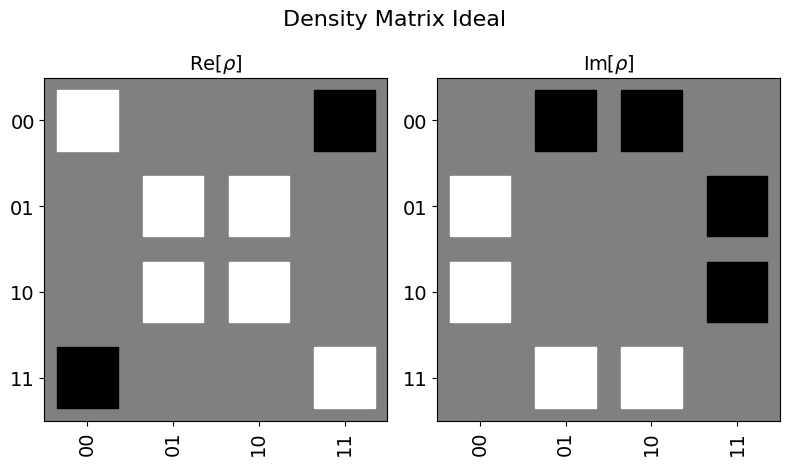

In [14]:
#第一种模拟qiskit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
DensityMatrix.from_instruction(qis)

plot_state_hinton(DensityMatrix.from_instruction(qis), title='Density Matrix Ideal')
# plot_state_hinton(DensityMatrix(ideal), title='Density Matrix Experiment')

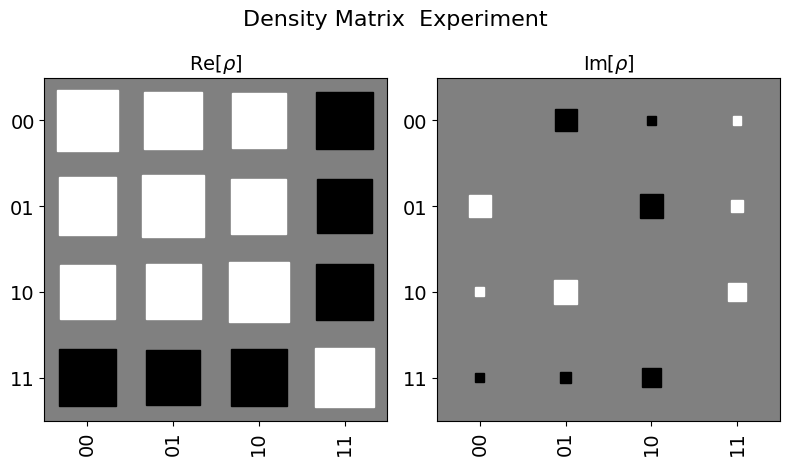

In [199]:
from qiskit.quantum_info.states.densitymatrix import DensityMatrix
a = density
string = [bin(i)[2:].zfill(2) for i in range(2**2)]
aa = pd.DataFrame(a, columns = [k[::-1] for k in string], index=[k[::-1] for k in string])
aa = aa.sort_index(axis=0)
aa = aa.sort_index(axis=1)
a = np.array(aa)
plot_state_hinton(DensityMatrix(a), title='Density Matrix  Experiment')
# plot_state_city(DensityMatrix(a), title='Density Matrix Experiment')

In [200]:
ideal = DensityMatrix.from_instruction(qis).data
ideal.shape
state = a
# state = ideal

np.real(np.trace(state@ideal)/np.trace(state)/np.trace(ideal))

0.8868199824365847

In [438]:
ideal = DensityMatrix.from_instruction(qis).data
ideal.shape
state = a
# state = ideal

np.real(np.trace(state@ideal)/np.trace(state)/np.trace(ideal))

0.9313842161159855

In [444]:
# H, -1
0.9508912462945776/0.8840047573128722

# #Rx np.pi , -1
0.9250675466052211/0.8179046471021727
#Rx np.pi , 0
0.8877799248823804/0.8736895249429407
#Rx np.pi , np.pi/2
0.9313842161159855/ 0.8669871899186585

1.0756630418879436

In [ ]:
ll = state_fidelity = [0.977, 
                  0.550,
                  0.539,
                  0.288

Text(0.5, 1.0, 'state fidelity')

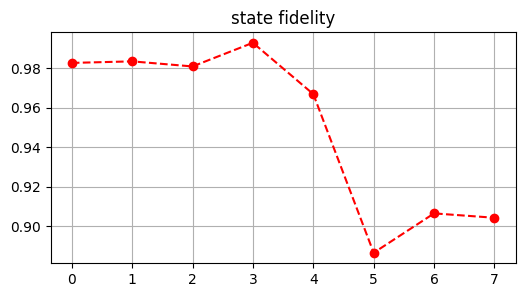

In [271]:
ll = state_fidelity = [0.9826855713627093, 
                  0.9834711050875156,
                  0.9809018512727559,
                  0.9928686265435861,
                  0.9669051914795868,
                  0.8866631162720467,
                  0.9065844044603195,
                  0.9043708053278449]
# ll = state_fidelity = [0.977, 
#                   0.550,
#                   0.539,
#                   0.288]
fig, ax = plt.subplots(figsize=[6,3])
ax.plot(ll,'ro--')
# ax.xlines(y = 0.2)
# ax.axhline(0.2, ls = '--')
# ax.axhline(0.5, ls = '--')
ax.grid()
# ax.set(ylim=(0,1))
ax.set_title('state fidelity')
# plt.plot(ll)
# plt.title('Trace Distance')



In [446]:
tid

2409181618145373350

## Trace Distance

In [164]:
import sympy as sy
mm = sy.Matrix(DensityMatrix.from_instruction(qis).data)



(2, 8, 8)

# QPT

In [48]:
from qiskit.quantum_info import DensityMatrix, Chi, SuperOp, Kraus, process_fidelity,diamond_norm
from qiskit.quantum_info.operators.channel import Choi, SuperOp
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qlisp.circuits.tomo import chi0_to_chi, chi_to_chi0, qst_mle, qpt, qptInitList, qstOpList



In [34]:

def chi_qpt_plot(chi, fig = None, ax=None, plot_abs = False):
    if plot_abs:
        cax = ax[0].imshow(np.abs(chi), vmin=-1, vmax=1, origin='upper',cmap='RdBu_r')
        fig.colorbar(cax, ax=ax[0])
        cax = ax[1].imshow(np.unwrap(np.angle(chi)), vmin=0, vmax=np.pi*2, origin='upper',cmap='RdBu_r')
        fig.colorbar(cax, ax=ax[1])
    else:
        lim = np.max(np.abs(chi))
        cax = ax[0].imshow(chi.real, vmin=-lim, vmax=lim, origin='upper',cmap='RdBu_r')
        fig.colorbar(cax, ax=ax[0])
        cax = ax[1].imshow(chi.imag, vmin=-lim, vmax=lim, origin='upper',cmap='RdBu_r')
        fig.colorbar(cax, ax=ax[1])


def qpt_plot(diags, fig = None, ax=None):
    
    rList = []
    for a in diags:
        rList.append(qst_mle(a))
    chi = qpt(rList)
    
    chi_qpt_plot(chi, fig=fig, ax=ax)
    return chi

In [108]:
inis = list(qptInitList(2))
# qsts = [1,2,3]
qsts = list(qstOpList(2))
# list(zip(ini, qst))
n = 2
for ini in inis:
    for qst in qsts:
ini_qlisp = [*[(inis[i], i) for i in range(n)]]
qst_qlisp = [*[(qsts[i], i) for i in range(n)]]
ini_qlisp



[(('I', 'I'), 0), (('I', 'X'), 1)]

In [116]:
(inis[0],qsts[0])

(('I', 'I'), ('-Y/2', '-Y/2'))

In [118]:
def QPT(process, n):

    inis = list(qptInitList(2))
    qsts = list(qstOpList(2))

    qpt_qlisp = {}


    for ini in inis:
        for qst in qsts:
            ini_qlisp = [*[(inis[i], i) for i in range(n)]]
            qst_qlisp = [*[(qsts[i], i) for i in range(n)]]
            qpt_qlisp[(ini,qst)] = ini_qlisp+process+qst_qlisp+[ (("Measure",i) , i ) for i in range(n)]
    return qpt_qlisp



In [208]:
reload(vbw)
reload(tools)
circ = quafuQC(2)
qlisp = []
# add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0=1)
add_H(qlisp_ins=qlisp, circ=circ, q0 = 0)
# add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=np.pi/2, q0=2)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)
# add_R(axis='Rx',qlisp_ins=qlisp, circ=circ,phi=-1, q0=1)
# add_H(qlisp_ins=qlisp, circ=circ, q0 = 2)
add_CZ(qlisp_ins=qlisp, circ=circ,q0=0,q1=1)

open = circ.to_openqasm()
from qiskit import QuantumCircuit
qis = QuantumCircuit(3)
qis = qis.from_qasm_str(open)

a = Chi(qis).data
# a.data.shape
# a.shape


In [209]:
open = circ.to_openqasm()
from qiskit import QuantumCircuit
qis = QuantumCircuit(2)
qis = qis.from_qasm_str(open)

a = Chi(qis).data

In [210]:
a

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.

In [203]:
a
string = [bin(i)[2:].zfill(2) for i in range(2**2)]
aa = pd.DataFrame(a, columns = [k[::-1] for k in string], index=[k[::-1] for k in string])
aa = aa.sort_index(axis=0)
aa = aa.sort_index(axis=1)
a = np.array(aa)

ValueError: Shape of passed values is (16, 16), indices imply (4, 4)

In [61]:
for qpt in qpt_list:
    task = {
        'chip':chip,
        'name':'gyb_qpt',
        'circuit':qpt,
        'compile' : False, 
    }
    tid = tmgr.run(task, repeat=20)
    tids.append(tid)
    print(tid)

NameError: name 'qpt_list' is not defined

In [62]:
array = np.array
b = array([[[0.46582031, 0.03417969, 0.45507812, 0.04492188],
        [0.24609375, 0.23632812, 0.265625  , 0.25195312],
        [0.25878906, 0.21777344, 0.24511719, 0.27832031],
        [0.45703125, 0.04003906, 0.45703125, 0.04589844],
        [0.23730469, 0.25195312, 0.265625  , 0.24511719],
        [0.25390625, 0.25976562, 0.24316406, 0.24316406],
        [0.94824219, 0.02929688, 0.00488281, 0.01757812],
        [0.54003906, 0.43261719, 0.00976562, 0.01757812],
        [0.4921875 , 0.48828125, 0.01074219, 0.00878906]],

       [[0.07617188, 0.41308594, 0.07617188, 0.43457031],
        [0.26367188, 0.24316406, 0.22949219, 0.26367188],
        [0.27539062, 0.21484375, 0.27539062, 0.234375  ],
        [0.06933594, 0.45410156, 0.07617188, 0.40039062],
        [0.25976562, 0.22363281, 0.25      , 0.26660156],
        [0.26171875, 0.24804688, 0.24121094, 0.24902344],
        [0.08886719, 0.87207031, 0.02050781, 0.01855469],
        [0.5078125 , 0.47070312, 0.00878906, 0.01269531],
        [0.50585938, 0.4765625 , 0.00585938, 0.01171875]],

       [[0.25390625, 0.23632812, 0.26074219, 0.24902344],
        [0.24609375, 0.25390625, 0.23730469, 0.26269531],
        [0.47363281, 0.00683594, 0.5078125 , 0.01171875],
        [0.23925781, 0.24804688, 0.25390625, 0.25878906],
        [0.25976562, 0.22363281, 0.25976562, 0.25683594],
        [0.48046875, 0.00585938, 0.50390625, 0.00976562],
        [0.50195312, 0.47265625, 0.01171875, 0.01367188],
        [0.49511719, 0.47753906, 0.01074219, 0.01660156],
        [0.96484375, 0.01855469, 0.01660156, 0.        ]],

       [[0.24609375, 0.265625  , 0.23730469, 0.25097656],
        [0.4453125 , 0.05664062, 0.45703125, 0.04101562],
        [0.25      , 0.26171875, 0.23535156, 0.25292969],
        [0.2421875 , 0.24023438, 0.24902344, 0.26855469],
        [0.41015625, 0.04296875, 0.48730469, 0.05957031],
        [0.25      , 0.2265625 , 0.29492188, 0.22851562],
        [0.51855469, 0.45996094, 0.01367188, 0.0078125 ],
        [0.95019531, 0.03222656, 0.00390625, 0.01367188],
        [0.515625  , 0.46289062, 0.00488281, 0.01660156]],

       [[0.07714844, 0.39648438, 0.08105469, 0.4453125 ],
        [0.2578125 , 0.25      , 0.25097656, 0.24121094],
        [0.25097656, 0.27539062, 0.25976562, 0.21386719],
        [0.07519531, 0.41894531, 0.07226562, 0.43359375],
        [0.24804688, 0.24804688, 0.24804688, 0.25585938],
        [0.25488281, 0.25292969, 0.2578125 , 0.234375  ],
        [0.0625    , 0.01464844, 0.10449219, 0.81835938],
        [0.04101562, 0.04101562, 0.44824219, 0.46972656],
        [0.05957031, 0.05761719, 0.46972656, 0.41308594]],

       [[0.46875   , 0.05078125, 0.43066406, 0.04980469],
        [0.25683594, 0.24023438, 0.24707031, 0.25585938],
        [0.24902344, 0.22851562, 0.27148438, 0.25097656],
        [0.45605469, 0.04296875, 0.45898438, 0.04199219],
        [0.25585938, 0.23828125, 0.24609375, 0.25976562],
        [0.2734375 , 0.23046875, 0.26660156, 0.22949219],
        [0.00683594, 0.07421875, 0.86816406, 0.05078125],
        [0.05078125, 0.04199219, 0.46191406, 0.4453125 ],
        [0.04199219, 0.04492188, 0.48144531, 0.43164062]],

       [[0.25585938, 0.21679688, 0.25097656, 0.27636719],
        [0.22265625, 0.23632812, 0.26367188, 0.27734375],
        [0.48828125, 0.00976562, 0.49121094, 0.01074219],
        [0.24316406, 0.25292969, 0.23339844, 0.27050781],
        [0.25585938, 0.24414062, 0.24902344, 0.25097656],
        [0.4921875 , 0.00976562, 0.484375  , 0.01367188],
        [0.03710938, 0.0546875 , 0.45019531, 0.45800781],
        [0.03417969, 0.04882812, 0.44140625, 0.47558594],
        [0.09375   , 0.00683594, 0.87597656, 0.0234375 ]],

       [[0.23535156, 0.25683594, 0.26855469, 0.23925781],
        [0.08398438, 0.41992188, 0.06640625, 0.4296875 ],
        [0.28417969, 0.26367188, 0.23730469, 0.21484375],
        [0.27929688, 0.24804688, 0.234375  , 0.23828125],
        [0.08203125, 0.40332031, 0.07226562, 0.44238281],
        [0.26953125, 0.23046875, 0.26464844, 0.23535156],
        [0.04589844, 0.04199219, 0.44433594, 0.46777344],
        [0.0625    , 0.01171875, 0.0859375 , 0.83984375],
        [0.04589844, 0.04199219, 0.48046875, 0.43164062]],

       [[0.2734375 , 0.23730469, 0.23828125, 0.25097656],
        [0.24121094, 0.26074219, 0.26367188, 0.234375  ],
        [0.4765625 , 0.02832031, 0.04296875, 0.45214844],
        [0.24316406, 0.27050781, 0.24023438, 0.24609375],
        [0.3984375 , 0.07519531, 0.07617188, 0.45019531],
        [0.26074219, 0.22851562, 0.25292969, 0.2578125 ],
        [0.46582031, 0.04003906, 0.04003906, 0.45410156],
        [0.24609375, 0.2578125 , 0.23339844, 0.26269531],
        [0.25097656, 0.23925781, 0.265625  , 0.24414062]],

       [[0.22460938, 0.23828125, 0.27636719, 0.26074219],
        [0.25585938, 0.27246094, 0.23730469, 0.234375  ],
        [0.46679688, 0.03320312, 0.04980469, 0.45019531],
        [0.24023438, 0.23925781, 0.27734375, 0.24316406],
        [0.08789062, 0.41601562, 0.43945312, 0.05664062],
        [0.26269531, 0.24023438, 0.25683594, 0.24023438],
        [0.04785156, 0.46679688, 0.45117188, 0.03417969],
        [0.23535156, 0.26757812, 0.25585938, 0.24121094],
        [0.23828125, 0.24414062, 0.24414062, 0.2734375 ]],

       [[0.48242188, 0.4296875 , 0.04199219, 0.04589844],
        [0.47265625, 0.4609375 , 0.03613281, 0.03027344],
        [0.953125  , 0.01367188, 0.02539062, 0.0078125 ],
        [0.26464844, 0.24804688, 0.2421875 , 0.24511719],
        [0.26171875, 0.24804688, 0.23535156, 0.25488281],
        [0.48828125, 0.01269531, 0.49414062, 0.00488281],
        [0.26074219, 0.24023438, 0.22949219, 0.26953125],
        [0.234375  , 0.23144531, 0.26660156, 0.26757812],
        [0.5       , 0.01171875, 0.47851562, 0.00976562]],

       [[0.27050781, 0.24414062, 0.25097656, 0.234375  ],
        [0.265625  , 0.24804688, 0.24023438, 0.24609375],
        [0.49609375, 0.03613281, 0.03515625, 0.43261719],
        [0.05859375, 0.44921875, 0.42285156, 0.06933594],
        [0.24609375, 0.26269531, 0.24804688, 0.24316406],
        [0.21777344, 0.265625  , 0.28515625, 0.23144531],
        [0.26953125, 0.24804688, 0.24511719, 0.23730469],
        [0.44238281, 0.03808594, 0.04296875, 0.4765625 ],
        [0.27929688, 0.22070312, 0.24609375, 0.25390625]],

       [[0.22851562, 0.26855469, 0.26660156, 0.23632812],
        [0.43554688, 0.04980469, 0.06738281, 0.44726562],
        [0.27441406, 0.22167969, 0.26953125, 0.234375  ],
        [0.265625  , 0.2421875 , 0.26171875, 0.23046875],
        [0.25097656, 0.2578125 , 0.25878906, 0.23242188],
        [0.06445312, 0.43261719, 0.45996094, 0.04296875],
        [0.47265625, 0.04589844, 0.04882812, 0.43261719],
        [0.26367188, 0.25292969, 0.25976562, 0.22363281],
        [0.20996094, 0.25976562, 0.26269531, 0.26757812]],

       [[0.27441406, 0.24609375, 0.2421875 , 0.23730469],
        [0.06640625, 0.40429688, 0.44238281, 0.08691406],
        [0.25976562, 0.23925781, 0.2421875 , 0.25878906],
        [0.28027344, 0.22851562, 0.24023438, 0.25097656],
        [0.26269531, 0.23828125, 0.24414062, 0.25488281],
        [0.05371094, 0.44628906, 0.45214844, 0.04785156],
        [0.05273438, 0.43457031, 0.47070312, 0.04199219],
        [0.24414062, 0.25683594, 0.25585938, 0.24316406],
        [0.2578125 , 0.22070312, 0.27050781, 0.25097656]],

       [[0.2578125 , 0.25488281, 0.26074219, 0.2265625 ],
        [0.23535156, 0.24023438, 0.27148438, 0.25292969],
        [0.50488281, 0.0078125 , 0.47460938, 0.01269531],
        [0.06640625, 0.06542969, 0.42773438, 0.44042969],
        [0.06347656, 0.0546875 , 0.43066406, 0.45117188],
        [0.08691406, 0.0078125 , 0.89355469, 0.01171875],
        [0.26269531, 0.25292969, 0.25585938, 0.22851562],
        [0.23144531, 0.26953125, 0.25195312, 0.24707031],
        [0.47753906, 0.00683594, 0.50390625, 0.01171875]],

       [[0.0625    , 0.42285156, 0.43261719, 0.08203125],
        [0.25488281, 0.25      , 0.24902344, 0.24609375],
        [0.24707031, 0.23144531, 0.2578125 , 0.26367188],
        [0.24316406, 0.22949219, 0.2734375 , 0.25390625],
        [0.23144531, 0.24316406, 0.24023438, 0.28515625],
        [0.06152344, 0.44140625, 0.45507812, 0.04199219],
        [0.23632812, 0.24316406, 0.28125   , 0.23925781],
        [0.46289062, 0.04589844, 0.04101562, 0.45019531],
        [0.24902344, 0.23925781, 0.30566406, 0.20605469]]])

b = array([[[0.43847656, 0.03125   , 0.48632812, 0.04394531],
        [0.26953125, 0.24804688, 0.23828125, 0.24414062],
        [0.22851562, 0.265625  , 0.25488281, 0.25097656],
        [0.453125  , 0.03808594, 0.47070312, 0.03808594],
        [0.27734375, 0.22753906, 0.27246094, 0.22265625],
        [0.24804688, 0.23046875, 0.27832031, 0.24316406],
        [0.96191406, 0.01953125, 0.00292969, 0.015625  ],
        [0.51464844, 0.47265625, 0.00488281, 0.0078125 ],
        [0.51074219, 0.47167969, 0.00878906, 0.00878906]],

       [[0.06152344, 0.44238281, 0.08984375, 0.40625   ],
        [0.21777344, 0.26171875, 0.25488281, 0.265625  ],
        [0.24121094, 0.22460938, 0.28613281, 0.24804688],
        [0.07421875, 0.39453125, 0.08398438, 0.44726562],
        [0.24902344, 0.23925781, 0.25195312, 0.25976562],
        [0.26074219, 0.22753906, 0.24316406, 0.26855469],
        [0.11425781, 0.86425781, 0.01171875, 0.00976562],
        [0.4765625 , 0.49023438, 0.01464844, 0.01855469],
        [0.49609375, 0.47753906, 0.015625  , 0.01074219]],

       [[0.26757812, 0.24511719, 0.24609375, 0.24121094],
        [0.23144531, 0.24023438, 0.25878906, 0.26953125],
        [0.51367188, 0.00195312, 0.4765625 , 0.0078125 ],
        [0.24707031, 0.23828125, 0.27050781, 0.24414062],
        [0.25488281, 0.23339844, 0.24609375, 0.265625  ],
        [0.50195312, 0.0078125 , 0.47753906, 0.01269531],
        [0.53125   , 0.453125  , 0.00585938, 0.00976562],
        [0.47949219, 0.49609375, 0.00976562, 0.01464844],
        [0.96582031, 0.01464844, 0.01660156, 0.00292969]],

       [[0.23730469, 0.24023438, 0.26269531, 0.25976562],
        [0.45117188, 0.04296875, 0.46191406, 0.04394531],
        [0.24511719, 0.25878906, 0.26269531, 0.23339844],
        [0.23730469, 0.25976562, 0.234375  , 0.26855469],
        [0.45507812, 0.03222656, 0.47363281, 0.0390625 ],
        [0.22558594, 0.2578125 , 0.26953125, 0.24707031],
        [0.47558594, 0.49609375, 0.01171875, 0.01660156],
        [0.953125  , 0.03027344, 0.00390625, 0.01269531],
        [0.51367188, 0.45898438, 0.01269531, 0.01464844]],

       [[0.10644531, 0.37792969, 0.08886719, 0.42675781],
        [0.2265625 , 0.25488281, 0.27929688, 0.23925781],
        [0.28515625, 0.21484375, 0.26464844, 0.23535156],
        [0.08496094, 0.41699219, 0.08789062, 0.41015625],
        [0.22070312, 0.25292969, 0.27148438, 0.25488281],
        [0.29101562, 0.23339844, 0.2578125 , 0.21777344],
        [0.07324219, 0.01464844, 0.10058594, 0.81152344],
        [0.04394531, 0.04785156, 0.44238281, 0.46582031],
        [0.0390625 , 0.05175781, 0.46582031, 0.44335938]],

       [[0.40917969, 0.04296875, 0.50488281, 0.04296875],
        [0.25195312, 0.22949219, 0.25976562, 0.25878906],
        [0.28125   , 0.234375  , 0.24707031, 0.23730469],
        [0.4765625 , 0.05175781, 0.43457031, 0.03710938],
        [0.25390625, 0.25292969, 0.24121094, 0.25195312],
        [0.25585938, 0.23242188, 0.26171875, 0.25      ],
        [0.0078125 , 0.09667969, 0.85644531, 0.0390625 ],
        [0.04101562, 0.06152344, 0.48632812, 0.41113281],
        [0.03515625, 0.05175781, 0.48535156, 0.42773438]],

       [[0.26953125, 0.234375  , 0.23144531, 0.26464844],
        [0.25390625, 0.24316406, 0.27050781, 0.23242188],
        [0.48339844, 0.0078125 , 0.49804688, 0.01074219],
        [0.25292969, 0.24609375, 0.23828125, 0.26269531],
        [0.27539062, 0.23828125, 0.2421875 , 0.24414062],
        [0.50097656, 0.00976562, 0.48144531, 0.0078125 ],
        [0.04882812, 0.04785156, 0.45117188, 0.45214844],
        [0.04882812, 0.04296875, 0.44726562, 0.4609375 ],
        [0.10742188, 0.00195312, 0.87695312, 0.01367188]],

       [[0.25585938, 0.24316406, 0.26074219, 0.24023438],
        [0.08300781, 0.41992188, 0.08105469, 0.41601562],
        [0.26660156, 0.2265625 , 0.27636719, 0.23046875],
        [0.27148438, 0.22167969, 0.27441406, 0.23242188],
        [0.07519531, 0.44726562, 0.06738281, 0.41015625],
        [0.27734375, 0.22558594, 0.28613281, 0.2109375 ],
        [0.04394531, 0.04101562, 0.47851562, 0.43652344],
        [0.08203125, 0.0234375 , 0.1015625 , 0.79296875],
        [0.04003906, 0.04980469, 0.48144531, 0.42871094]],

       [[0.265625  , 0.21777344, 0.26367188, 0.25292969],
        [0.25097656, 0.23730469, 0.2734375 , 0.23828125],
        [0.47949219, 0.02929688, 0.04101562, 0.45019531],
        [0.2421875 , 0.24609375, 0.26074219, 0.25097656],
        [0.4296875 , 0.0703125 , 0.06933594, 0.43066406],
        [0.27734375, 0.21484375, 0.27050781, 0.23730469],
        [0.4453125 , 0.04785156, 0.05078125, 0.45605469],
        [0.26074219, 0.25878906, 0.22949219, 0.25097656],
        [0.26171875, 0.24804688, 0.25488281, 0.23535156]],

       [[0.2265625 , 0.27636719, 0.25292969, 0.24414062],
        [0.28808594, 0.234375  , 0.24902344, 0.22851562],
        [0.47753906, 0.03222656, 0.04492188, 0.4453125 ],
        [0.27246094, 0.22851562, 0.24511719, 0.25390625],
        [0.07714844, 0.41015625, 0.44824219, 0.06445312],
        [0.26855469, 0.23828125, 0.26269531, 0.23046875],
        [0.05175781, 0.453125  , 0.46679688, 0.02832031],
        [0.22363281, 0.29589844, 0.23730469, 0.24316406],
        [0.26269531, 0.25683594, 0.23828125, 0.2421875 ]],

       [[0.45703125, 0.45214844, 0.046875  , 0.04394531],
        [0.46191406, 0.44824219, 0.04199219, 0.04785156],
        [0.96679688, 0.00585938, 0.02539062, 0.00195312],
        [0.25488281, 0.234375  , 0.25292969, 0.2578125 ],
        [0.24707031, 0.24023438, 0.27050781, 0.2421875 ],
        [0.52441406, 0.00878906, 0.45898438, 0.0078125 ],
        [0.24023438, 0.24707031, 0.25      , 0.26269531],
        [0.22167969, 0.24511719, 0.29394531, 0.23925781],
        [0.47460938, 0.00878906, 0.50976562, 0.00683594]],

       [[0.27050781, 0.23535156, 0.25292969, 0.24121094],
        [0.24707031, 0.26269531, 0.22851562, 0.26171875],
        [0.47753906, 0.03710938, 0.07519531, 0.41015625],
        [0.06640625, 0.43066406, 0.43261719, 0.0703125 ],
        [0.27832031, 0.25097656, 0.25195312, 0.21875   ],
        [0.27441406, 0.22460938, 0.26074219, 0.24023438],
        [0.23046875, 0.27050781, 0.25488281, 0.24414062],
        [0.5       , 0.03320312, 0.03710938, 0.4296875 ],
        [0.27832031, 0.22363281, 0.25683594, 0.24121094]],

       [[0.24804688, 0.25585938, 0.25      , 0.24609375],
        [0.45117188, 0.05566406, 0.07226562, 0.42089844],
        [0.25683594, 0.24902344, 0.23535156, 0.25878906],
        [0.22167969, 0.24316406, 0.29003906, 0.24511719],
        [0.23144531, 0.27441406, 0.26757812, 0.2265625 ],
        [0.05273438, 0.44726562, 0.47167969, 0.02832031],
        [0.45019531, 0.046875  , 0.0625    , 0.44042969],
        [0.24316406, 0.24414062, 0.26171875, 0.25097656],
        [0.2578125 , 0.23730469, 0.28027344, 0.22460938]],

       [[0.27148438, 0.23632812, 0.24121094, 0.25097656],
        [0.06933594, 0.4375    , 0.4453125 , 0.04785156],
        [0.27148438, 0.21777344, 0.26171875, 0.24902344],
        [0.23828125, 0.23632812, 0.25390625, 0.27148438],
        [0.24023438, 0.23144531, 0.26855469, 0.25976562],
        [0.06054688, 0.45703125, 0.453125  , 0.02929688],
        [0.0625    , 0.44726562, 0.45117188, 0.0390625 ],
        [0.25195312, 0.26171875, 0.25097656, 0.23535156],
        [0.26660156, 0.23046875, 0.27441406, 0.22851562]],

       [[0.26074219, 0.24414062, 0.25097656, 0.24414062],
        [0.26757812, 0.24902344, 0.2578125 , 0.22558594],
        [0.4765625 , 0.01464844, 0.50097656, 0.0078125 ],
        [0.05664062, 0.05957031, 0.42773438, 0.45605469],
        [0.06933594, 0.08789062, 0.44238281, 0.40039062],
        [0.09082031, 0.0078125 , 0.89648438, 0.00488281],
        [0.24414062, 0.24511719, 0.26269531, 0.24804688],
        [0.22167969, 0.27734375, 0.2421875 , 0.25878906],
        [0.47851562, 0.00097656, 0.51074219, 0.00976562]],

       [[0.07714844, 0.45507812, 0.3984375 , 0.06933594],
        [0.27539062, 0.23632812, 0.24707031, 0.24121094],
        [0.265625  , 0.25097656, 0.25195312, 0.23144531],
        [0.25585938, 0.22460938, 0.28320312, 0.23632812],
        [0.25      , 0.22949219, 0.26660156, 0.25390625],
        [0.0625    , 0.47167969, 0.43554688, 0.03027344],
        [0.24414062, 0.27148438, 0.25683594, 0.22753906],
        [0.47167969, 0.04296875, 0.04785156, 0.4375    ],
        [0.24609375, 0.25292969, 0.25585938, 0.24511719]]])

b = array([[[0.48828125, 0.00878906, 0.49023438, 0.01269531],
        [0.25195312, 0.265625  , 0.23828125, 0.24414062],
        [0.24609375, 0.25585938, 0.25390625, 0.24414062],
        [0.49609375, 0.01171875, 0.48339844, 0.00878906],
        [0.24316406, 0.25390625, 0.25390625, 0.24902344],
        [0.23242188, 0.24804688, 0.25488281, 0.26464844],
        [0.96191406, 0.01464844, 0.02148438, 0.00195312],
        [0.48535156, 0.48828125, 0.01171875, 0.01464844],
        [0.50195312, 0.46582031, 0.015625  , 0.01660156]],

       [[0.06542969, 0.44042969, 0.06640625, 0.42773438],
        [0.25      , 0.21777344, 0.25878906, 0.2734375 ],
        [0.25976562, 0.25      , 0.25390625, 0.23632812],
        [0.05273438, 0.4296875 , 0.0703125 , 0.44726562],
        [0.24804688, 0.24804688, 0.23242188, 0.27148438],
        [0.25390625, 0.2578125 , 0.23632812, 0.25195312],
        [0.109375  , 0.8671875 , 0.00195312, 0.02148438],
        [0.52050781, 0.47167969, 0.00292969, 0.00488281],
        [0.50292969, 0.4765625 , 0.00976562, 0.01074219]],

       [[0.26074219, 0.27050781, 0.23242188, 0.23632812],
        [0.25      , 0.21777344, 0.25390625, 0.27832031],
        [0.484375  , 0.01171875, 0.49511719, 0.00878906],
        [0.25976562, 0.25585938, 0.23925781, 0.24511719],
        [0.25488281, 0.24414062, 0.234375  , 0.26660156],
        [0.47949219, 0.00585938, 0.5078125 , 0.00683594],
        [0.45898438, 0.5234375 , 0.0078125 , 0.00976562],
        [0.5078125 , 0.47070312, 0.0078125 , 0.01367188],
        [0.96191406, 0.01660156, 0.02050781, 0.00097656]],

       [[0.24316406, 0.25683594, 0.22460938, 0.27539062],
        [0.48144531, 0.01171875, 0.49609375, 0.01074219],
        [0.26367188, 0.22363281, 0.25683594, 0.25585938],
        [0.23632812, 0.2421875 , 0.25292969, 0.26855469],
        [0.49804688, 0.015625  , 0.47558594, 0.01074219],
        [0.24023438, 0.24121094, 0.28320312, 0.23535156],
        [0.49121094, 0.48242188, 0.01464844, 0.01171875],
        [0.97460938, 0.00976562, 0.015625  , 0.        ],
        [0.48339844, 0.49804688, 0.01269531, 0.00585938]],

       [[0.46679688, 0.00585938, 0.5234375 , 0.00390625],
        [0.25585938, 0.27441406, 0.25878906, 0.2109375 ],
        [0.25976562, 0.2734375 , 0.23925781, 0.22753906],
        [0.46191406, 0.00585938, 0.5234375 , 0.00878906],
        [0.25390625, 0.24804688, 0.25195312, 0.24609375],
        [0.25585938, 0.25585938, 0.24414062, 0.24414062],
        [0.07910156, 0.00097656, 0.90820312, 0.01171875],
        [0.0390625 , 0.03222656, 0.48925781, 0.43945312],
        [0.05175781, 0.04296875, 0.4296875 , 0.47558594]],

       [[0.04980469, 0.45410156, 0.05371094, 0.44238281],
        [0.26953125, 0.23730469, 0.24609375, 0.24707031],
        [0.26953125, 0.25390625, 0.24609375, 0.23046875],
        [0.06738281, 0.4453125 , 0.06542969, 0.421875  ],
        [0.25195312, 0.26855469, 0.23632812, 0.24316406],
        [0.26855469, 0.2421875 , 0.26269531, 0.2265625 ],
        [0.00683594, 0.06054688, 0.09375   , 0.83886719],
        [0.03613281, 0.03417969, 0.47949219, 0.45019531],
        [0.0546875 , 0.04199219, 0.46386719, 0.43945312]],

       [[0.24316406, 0.24609375, 0.25976562, 0.25097656],
        [0.24804688, 0.25585938, 0.24902344, 0.24707031],
        [0.47363281, 0.0078125 , 0.50585938, 0.01269531],
        [0.2421875 , 0.27148438, 0.25292969, 0.23339844],
        [0.25097656, 0.25292969, 0.25195312, 0.24414062],
        [0.49609375, 0.01074219, 0.48339844, 0.00976562],
        [0.0390625 , 0.04785156, 0.45800781, 0.45507812],
        [0.04492188, 0.04003906, 0.47851562, 0.43652344],
        [0.06152344, 0.        , 0.92382812, 0.01464844]],

       [[0.24707031, 0.24902344, 0.2421875 , 0.26171875],
        [0.48632812, 0.00683594, 0.50292969, 0.00390625],
        [0.24804688, 0.23730469, 0.2734375 , 0.24121094],
        [0.27148438, 0.23828125, 0.24804688, 0.2421875 ],
        [0.49707031, 0.01171875, 0.4765625 , 0.01464844],
        [0.25488281, 0.24804688, 0.2421875 , 0.25488281],
        [0.03222656, 0.03808594, 0.47167969, 0.45800781],
        [0.05664062, 0.00292969, 0.92578125, 0.01464844],
        [0.03417969, 0.04199219, 0.46386719, 0.45996094]],

       [[0.97070312, 0.01660156, 0.01171875, 0.00097656],
        [0.50488281, 0.47167969, 0.00976562, 0.01367188],
        [0.49121094, 0.48632812, 0.00976562, 0.01269531],
        [0.5       , 0.0078125 , 0.48242188, 0.00976562],
        [0.26855469, 0.24804688, 0.25683594, 0.2265625 ],
        [0.23046875, 0.26269531, 0.25390625, 0.25292969],
        [0.48339844, 0.01074219, 0.49804688, 0.0078125 ],
        [0.27246094, 0.24316406, 0.26464844, 0.21972656],
        [0.24414062, 0.25878906, 0.24414062, 0.25292969]],

       [[0.12597656, 0.83984375, 0.00585938, 0.02832031],
        [0.48730469, 0.49609375, 0.00488281, 0.01171875],
        [0.4765625 , 0.50683594, 0.01074219, 0.00585938],
        [0.06054688, 0.4375    , 0.06445312, 0.4375    ],
        [0.2734375 , 0.23828125, 0.24414062, 0.24414062],
        [0.27734375, 0.24023438, 0.23925781, 0.24316406],
        [0.06738281, 0.43945312, 0.05957031, 0.43359375],
        [0.24707031, 0.25292969, 0.24121094, 0.25878906],
        [0.27929688, 0.22070312, 0.27636719, 0.22363281]],

       [[0.50683594, 0.46191406, 0.01855469, 0.01269531],
        [0.50390625, 0.484375  , 0.00488281, 0.00683594],
        [0.96386719, 0.01855469, 0.01757812, 0.        ],
        [0.21777344, 0.26367188, 0.26953125, 0.24902344],
        [0.23339844, 0.25195312, 0.25976562, 0.25488281],
        [0.49511719, 0.00878906, 0.49023438, 0.00585938],
        [0.25      , 0.26074219, 0.25097656, 0.23828125],
        [0.25292969, 0.2421875 , 0.25878906, 0.24609375],
        [0.49511719, 0.0078125 , 0.49023438, 0.00683594]],

       [[0.46386719, 0.51855469, 0.00488281, 0.01269531],
        [0.96972656, 0.01367188, 0.01464844, 0.00195312],
        [0.51171875, 0.46777344, 0.00878906, 0.01171875],
        [0.26171875, 0.234375  , 0.24023438, 0.26367188],
        [0.47558594, 0.00976562, 0.50390625, 0.01074219],
        [0.25488281, 0.24902344, 0.26367188, 0.23242188],
        [0.26660156, 0.24316406, 0.24511719, 0.24511719],
        [0.50488281, 0.01757812, 0.47167969, 0.00585938],
        [0.25097656, 0.26464844, 0.23339844, 0.25097656]],

       [[0.484375  , 0.00683594, 0.50195312, 0.00683594],
        [0.26757812, 0.23828125, 0.24316406, 0.25097656],
        [0.25292969, 0.22851562, 0.26269531, 0.25585938],
        [0.09179688, 0.00195312, 0.89355469, 0.01269531],
        [0.04003906, 0.04394531, 0.47265625, 0.44335938],
        [0.04492188, 0.03808594, 0.45703125, 0.45996094],
        [0.49902344, 0.00683594, 0.48828125, 0.00585938],
        [0.25097656, 0.24804688, 0.2578125 , 0.24316406],
        [0.24414062, 0.25878906, 0.26367188, 0.23339844]],

       [[0.05273438, 0.4453125 , 0.06933594, 0.43261719],
        [0.265625  , 0.24609375, 0.2421875 , 0.24609375],
        [0.25292969, 0.25390625, 0.25488281, 0.23828125],
        [0.00585938, 0.08398438, 0.11914062, 0.79101562],
        [0.0546875 , 0.04003906, 0.43652344, 0.46875   ],
        [0.04296875, 0.03808594, 0.50683594, 0.41210938],
        [0.05078125, 0.41796875, 0.06738281, 0.46386719],
        [0.26074219, 0.21875   , 0.27832031, 0.2421875 ],
        [0.24707031, 0.23925781, 0.26074219, 0.25292969]],

       [[0.24414062, 0.23632812, 0.24511719, 0.27441406],
        [0.25585938, 0.26464844, 0.23632812, 0.24316406],
        [0.46679688, 0.00976562, 0.51660156, 0.00683594],
        [0.0390625 , 0.04492188, 0.46386719, 0.45214844],
        [0.0390625 , 0.0546875 , 0.46386719, 0.44238281],
        [0.07519531, 0.00097656, 0.91015625, 0.01367188],
        [0.265625  , 0.22460938, 0.24902344, 0.26074219],
        [0.26953125, 0.24707031, 0.25      , 0.23339844],
        [0.484375  , 0.00976562, 0.49511719, 0.01074219]],

       [[0.26464844, 0.26367188, 0.22363281, 0.24804688],
        [0.49121094, 0.0078125 , 0.49316406, 0.0078125 ],
        [0.25585938, 0.25683594, 0.24121094, 0.24609375],
        [0.04589844, 0.0390625 , 0.44238281, 0.47265625],
        [0.08886719, 0.00195312, 0.90039062, 0.00878906],
        [0.03417969, 0.06347656, 0.43457031, 0.46777344],
        [0.23730469, 0.24121094, 0.23828125, 0.28320312],
        [0.48339844, 0.01074219, 0.49707031, 0.00878906],
        [0.24707031, 0.24804688, 0.25488281, 0.25      ]]])

b = array([[[0.26757812, 0.23046875, 0.2734375 , 0.22851562],
        [0.27050781, 0.23339844, 0.25683594, 0.23925781],
        [0.46289062, 0.00683594, 0.52539062, 0.00488281],
        [0.26367188, 0.23535156, 0.24902344, 0.25195312],
        [0.24609375, 0.24121094, 0.2578125 , 0.25488281],
        [0.48046875, 0.00292969, 0.50585938, 0.01074219],
        [0.04785156, 0.046875  , 0.45605469, 0.44921875],
        [0.04882812, 0.03613281, 0.49707031, 0.41796875],
        [0.09375   , 0.00292969, 0.89160156, 0.01171875]],

       [[0.25097656, 0.27246094, 0.24804688, 0.22851562],
        [0.22949219, 0.25976562, 0.26953125, 0.24121094],
        [0.05761719, 0.43652344, 0.05371094, 0.45214844],
        [0.23535156, 0.28027344, 0.23632812, 0.24804688],
        [0.23828125, 0.25390625, 0.26367188, 0.24414062],
        [0.04101562, 0.44726562, 0.04785156, 0.46386719],
        [0.046875  , 0.05664062, 0.44335938, 0.453125  ],
        [0.04296875, 0.04492188, 0.47363281, 0.43847656],
        [0.0078125 , 0.07128906, 0.07421875, 0.84667969]],

       [[0.44824219, 0.03320312, 0.48144531, 0.03710938],
        [0.25292969, 0.23339844, 0.26464844, 0.24902344],
        [0.25976562, 0.25488281, 0.23925781, 0.24609375],
        [0.47460938, 0.03222656, 0.45507812, 0.03808594],
        [0.22460938, 0.26171875, 0.27148438, 0.2421875 ],
        [0.22851562, 0.25195312, 0.26074219, 0.25878906],
        [0.00878906, 0.08691406, 0.88085938, 0.0234375 ],
        [0.03515625, 0.03613281, 0.49023438, 0.43847656],
        [0.05371094, 0.03320312, 0.48339844, 0.4296875 ]],

       [[0.265625  , 0.26367188, 0.2421875 , 0.22851562],
        [0.06933594, 0.45898438, 0.0703125 , 0.40136719],
        [0.26757812, 0.24414062, 0.26171875, 0.2265625 ],
        [0.26757812, 0.21777344, 0.2734375 , 0.24121094],
        [0.06835938, 0.42089844, 0.07519531, 0.43554688],
        [0.25585938, 0.21972656, 0.28027344, 0.24414062],
        [0.04589844, 0.0546875 , 0.45410156, 0.4453125 ],
        [0.0703125 , 0.00976562, 0.08886719, 0.83105469],
        [0.05078125, 0.04394531, 0.46191406, 0.44335938]],

       [[0.22851562, 0.25976562, 0.27929688, 0.23242188],
        [0.25488281, 0.25683594, 0.24023438, 0.24804688],
        [0.48339844, 0.00585938, 0.50585938, 0.00488281],
        [0.24121094, 0.25097656, 0.25195312, 0.25585938],
        [0.25195312, 0.24511719, 0.24511719, 0.2578125 ],
        [0.48242188, 0.00195312, 0.5       , 0.015625  ],
        [0.50195312, 0.46777344, 0.01660156, 0.01367188],
        [0.45507812, 0.51660156, 0.015625  , 0.01269531],
        [0.96875   , 0.01269531, 0.01757812, 0.00097656]],

       [[0.25390625, 0.25      , 0.24511719, 0.25097656],
        [0.2734375 , 0.24023438, 0.23632812, 0.25      ],
        [0.04589844, 0.43945312, 0.04980469, 0.46484375],
        [0.26660156, 0.21875   , 0.27050781, 0.24414062],
        [0.25195312, 0.22265625, 0.26660156, 0.25878906],
        [0.04003906, 0.44824219, 0.04003906, 0.47167969],
        [0.48632812, 0.48339844, 0.01269531, 0.01757812],
        [0.4921875 , 0.4765625 , 0.01269531, 0.01855469],
        [0.09765625, 0.86523438, 0.00585938, 0.03125   ]],

       [[0.06347656, 0.421875  , 0.06542969, 0.44921875],
        [0.26171875, 0.23730469, 0.2421875 , 0.25878906],
        [0.25195312, 0.23925781, 0.25585938, 0.25292969],
        [0.06640625, 0.42773438, 0.07519531, 0.43066406],
        [0.25      , 0.22363281, 0.26367188, 0.26269531],
        [0.26953125, 0.2421875 , 0.26464844, 0.22363281],
        [0.09667969, 0.87695312, 0.01464844, 0.01171875],
        [0.52050781, 0.44921875, 0.015625  , 0.01464844],
        [0.54785156, 0.42675781, 0.01171875, 0.01367188]],

       [[0.23925781, 0.25390625, 0.27539062, 0.23144531],
        [0.48242188, 0.02929688, 0.45117188, 0.03710938],
        [0.26269531, 0.24316406, 0.24609375, 0.24804688],
        [0.23925781, 0.23535156, 0.2578125 , 0.26757812],
        [0.45898438, 0.03515625, 0.4609375 , 0.04492188],
        [0.26367188, 0.21191406, 0.26855469, 0.25585938],
        [0.50976562, 0.46777344, 0.01367188, 0.00878906],
        [0.95800781, 0.01855469, 0.00585938, 0.01757812],
        [0.50097656, 0.47460938, 0.0078125 , 0.01660156]],

       [[0.50683594, 0.43261719, 0.03125   , 0.02929688],
        [0.484375  , 0.45410156, 0.03515625, 0.02636719],
        [0.97460938, 0.        , 0.01953125, 0.00585938],
        [0.25976562, 0.23632812, 0.25878906, 0.24511719],
        [0.24511719, 0.25585938, 0.25976562, 0.23925781],
        [0.48828125, 0.00195312, 0.50585938, 0.00390625],
        [0.25976562, 0.23828125, 0.24414062, 0.2578125 ],
        [0.25292969, 0.24511719, 0.27148438, 0.23046875],
        [0.51074219, 0.00292969, 0.48144531, 0.00488281]],

       [[0.06152344, 0.06738281, 0.43652344, 0.43457031],
        [0.0703125 , 0.08203125, 0.45410156, 0.39355469],
        [0.06542969, 0.09375   , 0.03320312, 0.80761719],
        [0.23339844, 0.25195312, 0.25195312, 0.26269531],
        [0.27148438, 0.21582031, 0.25585938, 0.25683594],
        [0.04492188, 0.42480469, 0.046875  , 0.48339844],
        [0.25976562, 0.23046875, 0.26660156, 0.24316406],
        [0.28222656, 0.23632812, 0.24804688, 0.23339844],
        [0.04492188, 0.44921875, 0.06054688, 0.4453125 ]],

       [[0.26171875, 0.24902344, 0.23730469, 0.25195312],
        [0.26855469, 0.24121094, 0.25195312, 0.23828125],
        [0.46679688, 0.04101562, 0.03417969, 0.45800781],
        [0.26464844, 0.23925781, 0.22167969, 0.27441406],
        [0.06542969, 0.44335938, 0.4375    , 0.05371094],
        [0.24804688, 0.23535156, 0.26171875, 0.25488281],
        [0.04394531, 0.45410156, 0.47265625, 0.02929688],
        [0.25097656, 0.24414062, 0.27441406, 0.23046875],
        [0.23339844, 0.23046875, 0.28613281, 0.25      ]],

       [[0.24316406, 0.23339844, 0.25195312, 0.27148438],
        [0.25      , 0.24609375, 0.26171875, 0.2421875 ],
        [0.47265625, 0.03710938, 0.0546875 , 0.43554688],
        [0.06054688, 0.40039062, 0.47558594, 0.06347656],
        [0.23925781, 0.25683594, 0.25      , 0.25390625],
        [0.26855469, 0.22558594, 0.24609375, 0.25976562],
        [0.26757812, 0.24707031, 0.25390625, 0.23144531],
        [0.46582031, 0.03710938, 0.0390625 , 0.45800781],
        [0.24902344, 0.25292969, 0.25292969, 0.24511719]],

       [[0.22167969, 0.26269531, 0.25292969, 0.26269531],
        [0.25195312, 0.24804688, 0.25097656, 0.24902344],
        [0.5234375 , 0.00683594, 0.46484375, 0.00488281],
        [0.49023438, 0.44042969, 0.03613281, 0.03320312],
        [0.44921875, 0.47949219, 0.03515625, 0.03613281],
        [0.95996094, 0.00097656, 0.03417969, 0.00488281],
        [0.25488281, 0.234375  , 0.25488281, 0.25585938],
        [0.2734375 , 0.24609375, 0.23828125, 0.2421875 ],
        [0.50390625, 0.00292969, 0.49023438, 0.00292969]],

       [[0.25488281, 0.25390625, 0.24804688, 0.24316406],
        [0.27441406, 0.25      , 0.25      , 0.22558594],
        [0.04199219, 0.44042969, 0.04296875, 0.47460938],
        [0.05175781, 0.05566406, 0.46386719, 0.42871094],
        [0.07128906, 0.07128906, 0.47265625, 0.38476562],
        [0.05273438, 0.09667969, 0.03027344, 0.8203125 ],
        [0.265625  , 0.23730469, 0.24707031, 0.25      ],
        [0.25390625, 0.25292969, 0.25390625, 0.23925781],
        [0.0390625 , 0.45605469, 0.046875  , 0.45800781]],

       [[0.25097656, 0.26660156, 0.25585938, 0.2265625 ],
        [0.47265625, 0.04199219, 0.06542969, 0.41992188],
        [0.24804688, 0.25488281, 0.265625  , 0.23144531],
        [0.25585938, 0.24414062, 0.26660156, 0.23339844],
        [0.2734375 , 0.23535156, 0.26269531, 0.22851562],
        [0.46679688, 0.03417969, 0.05761719, 0.44140625],
        [0.04980469, 0.44824219, 0.45703125, 0.04492188],
        [0.25976562, 0.22949219, 0.2578125 , 0.25292969],
        [0.24804688, 0.25488281, 0.24414062, 0.25292969]],

       [[0.48632812, 0.04394531, 0.05859375, 0.41113281],
        [0.27832031, 0.22265625, 0.23144531, 0.26757812],
        [0.27734375, 0.25585938, 0.25292969, 0.21386719],
        [0.2578125 , 0.26367188, 0.25976562, 0.21875   ],
        [0.25878906, 0.23339844, 0.25878906, 0.24902344],
        [0.49707031, 0.03515625, 0.04785156, 0.41992188],
        [0.23730469, 0.27050781, 0.26464844, 0.22753906],
        [0.45800781, 0.03125   , 0.04003906, 0.47070312],
        [0.28027344, 0.22167969, 0.24707031, 0.25097656]]])


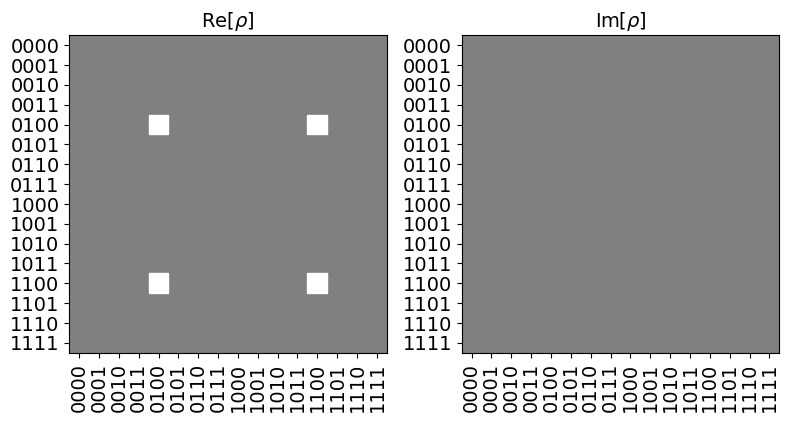

In [63]:
# fig, ax = plt.subplots(1, 2, figsize=[8,3])
plot_state_hinton(a)
# chi_qpt_plot(a, fig=fig, ax = ax)

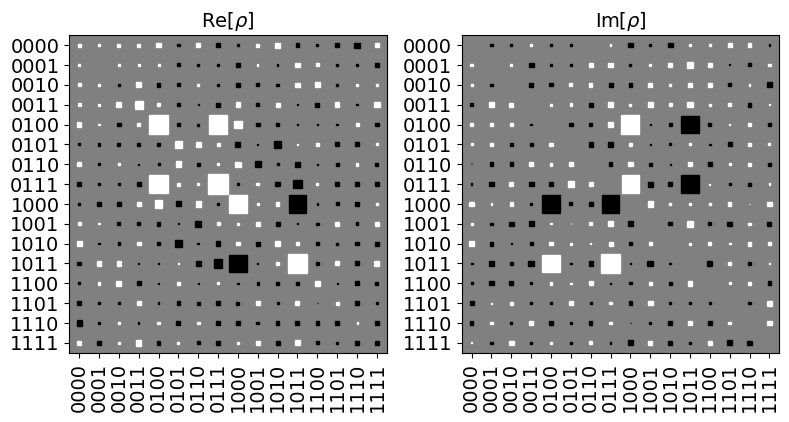

In [348]:
rList = []
for x in b:
    rList.append(qst_mle(x))
chi = qpt(rList)
plot_state_hinton(DensityMatrix(chi))

In [48]:
# chi0_to_chi(Chi(qis).data)


a = Chi(qis).data
# string = [bin(i)[2:].zfill(3) for i in range(2**2)]
# aa = pd.DataFrame(a, columns = [k[::-1] for k in string], index=[k[::-1] for k in string])
# aa = aa.sort_index(axis=0)
# aa = aa.sort_index(axis=1)
# a = np.array(aa)

# plot_state_hinton(a, title='Density Matrix  Experiment')

NameError: name 'Chi' is not defined

Object `Choi` not found.


In [49]:
#第一种模拟qiskit


choi = Choi(qis)
# Chi(qis).data 
diamond_norm(choi)

# plot_state_hinton(Kraus(qis), title='Density Matrix Idle')
# # plot_state_city(DensityMatrix.from_instruction(qis), title='Density Matrix Experimen

0.9999999996169948

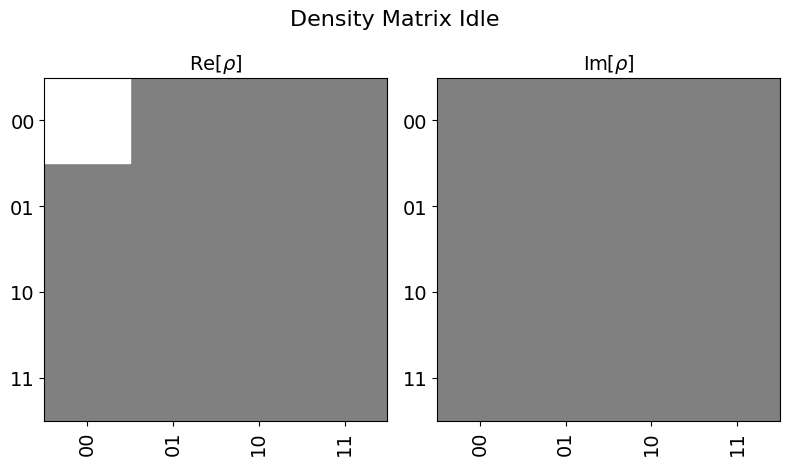

In [47]:
#第一种模拟qiskit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
DensityMatrix.from_instruction(qis)


plot_state_hinton(DensityMatrix.from_instruction(qis), title='Density Matrix Idle')
# plot_state_city(DensityMatrix.from_instruction(qis), title='Density Matrix Experiment')

In [13]:
from qlisp.circuits import qstOpList, qst_mle, qptInitList
len(list(qptInitList(2)))

16

In [14]:
len(list(qstOpList(2)))

9